# Base de données de l'étude 

## Phase 1: Récupération et Visualisation des Régions de France

Ce code télécharge les données géographiques des régions françaises, calcule leurs centroïdes et affiche une carte. Les centroïdes sont extraits pour chaque région et stockés sous forme de triplets (region, longitude, latitude) pour une utilisation ultérieure.

In [7]:
#Installation des bibliothèques nécessaires pour la récupération et la représentation des données géographiques
!pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree
!pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests
!pip install requests-cache retry-requests 
!pip install geopandas 
!pip install cartiflette

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [8]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [9]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [10]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...  
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....  
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...  
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...  
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...

In [11]:
print(france.crs)

EPSG:4326


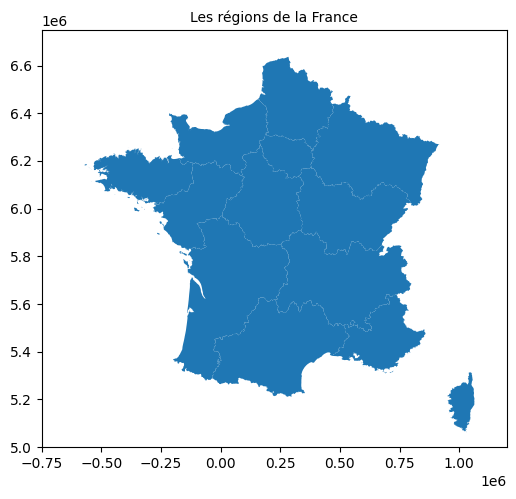

In [12]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


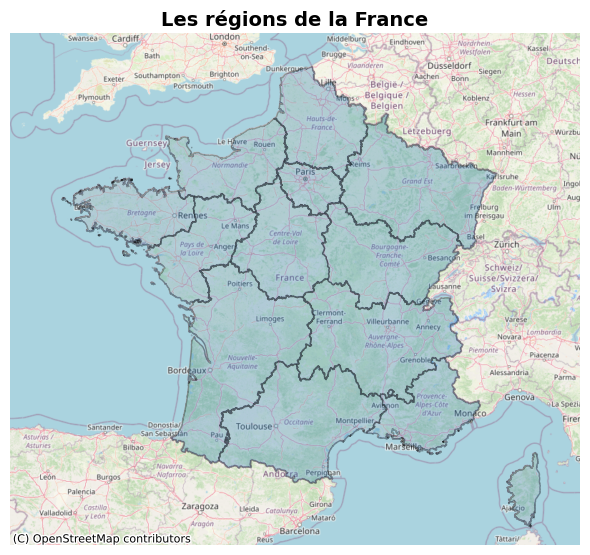

In [13]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


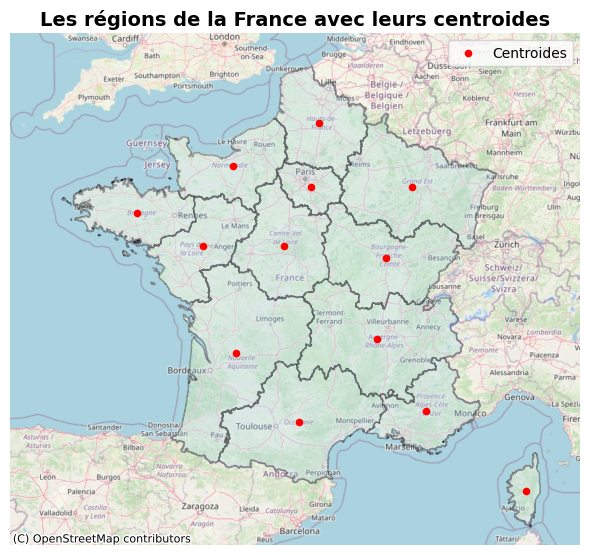

In [14]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [15]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\steph\AppData\Local\Temp\ipykernel_1164\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\steph\AppData\Local\Temp\ipykernel_1164\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [16]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  \
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...   
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....   
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...   
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...   
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...   

                           centroid  longitude   latitude  
0  POINT (-6850582.542 1827642.261) -61.539833  16.197646  
1    POINT (-5926644.81 436331.726) -53.239940   3.915167  
2  POINT (-6792650.367 1649468.223) -61.019379  14.654871  
3  POINT (5025789.843 -1439250.269)  45.147435 -12.820617  
4     POINT (504837.95 5704315.458)   4.536119  45.514642

In [17]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.53983304107784, 16.197645826552904),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.019378740773654, 14.654870858984358),
 ('Mayotte', 45.14743542382146, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656834),
 ('Occitanie', 2.143922833937654, 43.70250024549978),
 ('Bretagne', -2.841462676465886, 48.17754922086023),
 ('Nouvelle-Aquitaine', 0.21271860548694332, 45.2060395396088),
 ('Normandie', 0.11093239896467046, 49.12006667987373),
 ("Provence-Alpes-Côte d'Azur", 6.061004522552231, 43.95878857291765),
 ('Pays de la Loire', -0.81678598261894, 47.47810354487287),
 ('Grand Est', 5.613112231600144, 48.68897740160863),
 ('Bourgogne-Franche-Comté', 4.806856915301157, 47.2342819451994),
 ('Île-de-France', 2.503401392552759, 48.70931550109074),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284454),
 ('Hauts-de-France', 2.7713028658475474, 49.969593961262426),
 ('Corse', 9.106151755156151, 42.15151137562012),

# Phase 2: Collecte des Données de Qualité de l'Air

Ce script collecte des **données horaires de qualité de l'air** via l'API Open-Meteo pour différentes régions. 
Il récupère les polluants clés (**PM10**, **PM2.5**, **CO**, **NO₂**, **SO₂**, **Ozone**)  et quelques données sur le climat
et les organise dans un tableau structuré.

---

## **Fonctionnalités**
- Utilisation d'un **cache** et de **répétitions automatiques** pour des requêtes fiables.
- Organisation des données dans des **DataFrames pandas**.
- Ajout d'une colonne pour **extraire les dates** sans les heures.
- Fusion des données pour une **analyse centralisée**.





In [18]:
from scripts import api
from scripts.api import recup_data
var_air=["pm10", "pm2_5", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"]
combined_dataframe_air = api.recup_data("2023-01-01","2024-11-30","https://air-quality-api.open-meteo.com/v1/air-quality",var_air,region_centroides)

In [19]:
combined_dataframe_air

date         day      region  longitude  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
...                          ...         ...         ...        ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  55.532509   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion  55.532509   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion  55.532509   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion  55.532509   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion  55.532509   

         latitude       pm10  pm2_5  carbon_dioxide  nitrogen_dioxide  \
0       16.197646  20.500000   11.3             NaN              3.70   
1       16.197646  21.700001   11.9             NaN              3.45   
2       16.197646  21.799999   12.0             NaN              3.15   
3       16.197646  20.700001   11.4             NaN              2.60   
4       16.197646  19.400000   10.7             NaN              2.10   
...           ...        ...    ...             ...               ...   
302395 -21.133203  10.000000    7.1           459.0              3.60   
302396 -21.133203   9.800000    7.1           455.0              4.20   
302397 -21.133203   9.700000    7.0           453.0              4.50   
302398 -21.133203   9.500000    6.9           455.0              4.40   
302399 -21.133203   9.500000    7.0           459.0              4.10   

        sulphur_dioxide  ozone  
0                  0.30   62.0  
1                  0.30   62.0  
2                  0.25   63.0  
3                  0.25   64.0  
4                  0.25   64.0  
...                 ...    ...  
302395             2.50   56.0  
302396             2.30   52.0  
302397             2.20   49.0  
302398             2.10   47.0  
302399             2.10   46.0  

[302400 rows x 11 columns]

In [20]:
var_climat=["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]
combined_dataframe_climat = api.recup_data("2023-01-01","2024-11-30","https://archive-api.open-meteo.com/v1/archive",var_climat,region_centroides)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date","day"])

In [21]:
df_hourly=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df_hourly

date         day      region  longitude  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe -61.539833   
...                          ...         ...         ...        ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  55.532509   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion  55.532509   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion  55.532509   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion  55.532509   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion  55.532509   

         latitude       pm10  pm2_5  carbon_dioxide  nitrogen_dioxide  \
0       16.197646  20.500000   11.3             NaN              3.70   
1       16.197646  21.700001   11.9             NaN              3.45   
2       16.197646  21.799999   12.0             NaN              3.15   
3       16.197646  20.700001   11.4             NaN              2.60   
4       16.197646  19.400000   10.7             NaN              2.10   
...           ...        ...    ...             ...               ...   
302395 -21.133203  10.000000    7.1           459.0              3.60   
302396 -21.133203   9.800000    7.1           455.0              4.20   
302397 -21.133203   9.700000    7.0           453.0              4.50   
302398 -21.133203   9.500000    6.9           455.0              4.40   
302399 -21.133203   9.500000    7.0           459.0              4.10   

        sulphur_dioxide  ozone  longitude   latitude  temperature_2m  \
0                  0.30   62.0 -61.539833  16.197646       23.770000   
1                  0.30   62.0 -61.539833  16.197646       23.719999   
2                  0.25   63.0 -61.539833  16.197646       23.520000   
3                  0.25   64.0 -61.539833  16.197646       23.270000   
4                  0.25   64.0 -61.539833  16.197646       22.469999   
...                 ...    ...        ...        ...             ...   
302395             2.50   56.0  55.532509 -21.133203       10.291500   
302396             2.30   52.0  55.532509 -21.133203        9.891500   
302397             2.20   49.0  55.532509 -21.133203        9.391500   
302398             2.10   47.0  55.532509 -21.133203        8.891500   
302399             2.10   46.0  55.532509 -21.133203        9.091500   

        relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0                  84.863304            0.0       1017.400024        9.422101  
1                  85.643173            0.0       1017.599976        9.885262  
2                  86.947586            0.0       1017.700012        9.720000  
3                  88.269188            0.0       1017.400024        7.559999  
4                  94.082932            0.2       1017.299988        8.825508  
...                      ...            ...               ...             ...  
302395             93.833534            0.0        824.523071        3.617955  
302396             93.814590            0.0        823.957458        3.847960  
302397             97.342743            0.0        823.007019        3.065289  
302398             99.663048            0.0        822.137085        2.979530  
302399             99.663582            0.0        821.774109        3.710795  

[302400 rows x 18 columns]

In [22]:
#df_hourly=df_hourly.drop_duplicates()


In [23]:
# Agrégation par 'day' et 'region' en prenant la moyenne
df = df_hourly.groupby(['day', 'region']).mean().reset_index()

# 📊 ANALYSE EXPLORATOIRE

Cette analyse explore les données en **panel** afin de comprendre les tendances, les relations entre variables et les spécificités régionales et temporelles. 

Elle sert également de base à la préparation des données pour la modélisation prédictive.

---

## **1. Exploration de base des données**

### 🔍 **Statistiques descriptives globales**

### 🌍 Filtrage des Données : Régions Européennes

Dans cette étape, nous avons filtré les données pour ne conserver que les régions françaises situées en Europe. Ce filtrage est essentiel pour se concentrer sur les régions métropolitaines et éviter de mélanger les données avec celles des régions d'outre-mer.

---

#### **1. Liste des Régions Européennes**
Voici les 13 régions métropolitaines françaises incluses dans l'analyse :

1. Auvergne-Rhône-Alpes  
2. Bourgogne-Franche-Comté  
3. Bretagne  
4. Centre-Val de Loire  
5. Corse  
6. Grand Est  
7. Hauts-de-France  
8. Île-de-France  
9. Normandie  
10. Nouvelle-Aquitaine  
11. Occitanie  
12. Pays de la Loire  
13. Provence-Alpes-Côte d'Azur  

In [24]:

regions_europe = ["Auvergne-Rhône-Alpes","Bourgogne-Franche-Comté","Bretagne","Centre-Val de Loire","Corse","Grand Est","Hauts-de-France","Île-de-France","Normandie","Nouvelle-Aquitaine","Occitanie","Pays de la Loire",
    "Provence-Alpes-Côte d'Azur"
]

# Filtrage des régions européennes
df1 = df[df['region'].isin(regions_europe)]



In [25]:
df1.head()

day                   region                      date  longitude  \
0  2023-01-01     Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   4.536119   
1  2023-01-01  Bourgogne-Franche-Comté 2023-01-01 11:30:00+00:00   4.806857   
2  2023-01-01                 Bretagne 2023-01-01 11:30:00+00:00  -2.841463   
3  2023-01-01      Centre-Val de Loire 2023-01-01 11:30:00+00:00   1.684391   
4  2023-01-01                    Corse 2023-01-01 11:30:00+00:00   9.106152   

    latitude       pm10     pm2_5  carbon_dioxide  nitrogen_dioxide  \
0  45.514642  14.954166  7.858334             NaN          3.475000   
1  47.234282  13.300000  7.737500             NaN          3.795833   
2  48.177549   9.845834  5.720833             NaN          3.395833   
3  47.484775  13.750000  7.679167             NaN          2.837500   
4  42.151511   8.979167  5.345833             NaN          2.208333   

   sulphur_dioxide      ozone  longitude   latitude  temperature_2m  \
0         0.837500  62.250000   4.536119  45.514642       11.954083   
1         0.741667  59.541668   4.806857  47.234282       10.743833   
2         0.270833  64.916664  -2.841463  48.177549       10.547750   
3         0.770833  52.958332   1.684391  47.484775       14.431666   
4         0.341667  52.833332   9.106152  42.151511        6.793917   

   relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0             71.024551       0.000000        964.791809       23.574928  
1             77.391754       0.000000        963.939941       20.494823  
2             89.859863       0.358333        998.909729       18.512320  
3             66.970406       0.000000       1004.533508       18.958830  
4             73.633392       0.000000        841.699280        4.792229

In [26]:
df1.shape

(9100, 18)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9100 entries, 0 to 12599
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   day                   9100 non-null   object             
 1   region                9100 non-null   object             
 2   date                  9100 non-null   datetime64[ns, UTC]
 3   longitude             9100 non-null   float64            
 4   latitude              9100 non-null   float64            
 5   pm10                  9100 non-null   float32            
 6   pm2_5                 9100 non-null   float32            
 7   carbon_dioxide        468 non-null    float32            
 8   nitrogen_dioxide      9100 non-null   float32            
 9   sulphur_dioxide       9100 non-null   float32            
 10  ozone                 9100 non-null   float32            
 11  longitude             9100 non-null   float64            
 12  latitude  

####  🔍 Vérification de la structure des données panel

Nous allons vérifier si chaque combinaison region et day est unique

In [28]:
print(df1.groupby(['region', 'day']).size())
duplicates = df1.groupby(['region', 'day']).size()
print((duplicates > 1).sum())  # Vérifie combien de combinaisons ont plus d'une observation

region                day       
Auvergne-Rhône-Alpes  2023-01-01    1
                      2023-01-02    1
                      2023-01-03    1
                      2023-01-04    1
                      2023-01-05    1
                                   ..
Île-de-France         2024-11-26    1
                      2024-11-27    1
                      2024-11-28    1
                      2024-11-29    1
                      2024-11-30    1
Length: 9100, dtype: int64
0


### 🔍 Valeurs manquantes

In [29]:
df1.isnull().sum() / len(df1) * 100

day                      0.000000
region                   0.000000
date                     0.000000
longitude                0.000000
latitude                 0.000000
pm10                     0.000000
pm2_5                    0.000000
carbon_dioxide          94.857143
nitrogen_dioxide         0.000000
sulphur_dioxide          0.000000
ozone                    0.000000
longitude                0.000000
latitude                 0.000000
temperature_2m           0.000000
relative_humidity_2m     0.000000
precipitation            0.000000
surface_pressure         0.000000
wind_speed_10m           0.000000
dtype: float64

### **2. Observations Clés**
1. **Absence de valeurs manquantes** :  
   - La majorité des variables ne contiennent **aucune valeur manquante**, ce qui garantit une bonne qualité des données pour ces dimensions.

2. **Problème majeur avec `carbon_dioxide`** :  
   - Cette variable présente **94.86% de valeurs manquantes**, ce qui rend son utilisation directe problématique.
   - Nous allons donc supprimer cette colonne .

In [30]:
df1 = df1.drop(columns="carbon_dioxide")
df_hourly =df_hourly.drop(columns="carbon_dioxide")

## 🌍 Phase 3: Calcul de l'Indice ATMO

L'**indice ATMO** est utilisé en France pour évaluer la qualité de l'air en se basant sur cinq principaux polluants : **PM10**, **PM2.5**, **NO₂**, **O₃**, et **SO₂**. 

Il synthétise ces données en un indicateur unique, simple à interpréter.

---

### 🛠️ **Méthode de Calcul**

#### **1. Calcul des Sous-Indices**
Chaque polluant se voit attribuer un **sous-indice** en fonction de sa concentration moyenne journalière 

(ou glissante pour certains polluants). Les seuils sont définis comme suit :

| **Sous-indice** | **PM10 (µg/m³)** | **PM2.5 (µg/m³)** | **NO₂ (µg/m³)** | **O₃ (µg/m³)** | **SO₂ (µg/m³)** |
|-----------------|------------------|-------------------|-----------------|----------------|-----------------|
| 1 (Très bon)   | 0 - 6            | 0 - 5             | 0 - 29          | 0 - 29         | 0 - 39          |
| 2              | 7 - 13           | 6 - 10            | 30 - 54         | 30 - 54        | 40 - 79         |
| 3              | 14 - 20          | 11 - 15           | 55 - 84         | 55 - 79        | 80 - 119        |
| 4              | 21 - 27          | 16 - 20           | 85 - 109        | 80 - 104       | 120 - 159       |
| 5              | 28 - 34          | 21 - 25           | 110 - 134       | 105 - 129      | 160 - 199       |
| 6              | 35 - 41          | 26 - 30           | 135 - 164       | 130 - 149      | 200 - 249       |
| 7              | 42 - 49          | 31 - 40           | 165 - 199       | 150 - 179      | 250 - 299       |
| 8              | 50 - 64          | 41 - 50           | 200 - 274       | 180 - 209      | 300 - 399       |
| 9              | 65 - 79          | 51 - 75           | 275 - 399       | 210 - 239      | 400 - 499       |
| 10 (Très mauvais) | ≥ 80          | ≥ 76              | ≥ 400           | ≥ 240          | ≥ 500           |

#### **2. Détermination de l'Indice Final**
L'**indice ATMO** correspond au **sous-indice le plus élevé** parmi les cinq polluants mesurés sur une journée. 

Cela signifie que le polluant le plus préoccupant domine l'indicateur global.

---

### 📊 **Échelle de Qualité de l'Air**

| **Indice ATMO** | **Niveau de Qualité** | **Couleur Associée** |
|------------------|-----------------------|-----------------------|
| 1-2             | Très bon              | 🟢 Vert clair         |
| 3-4             | Bon                   | 🟢 Vert               |
| 5               | Moyen                 | 🟡 Jaune              |
| 6-7             | Médiocre              | 🟠 Orange             |
| 8-9             | Mauvais               | 🔴 Rouge              |
| 10              | Très mauvais          | 🟣 Violet             |

---

### 🔗 **Référence Officielle**
Pour plus de détails, consultez la page officielle de l'indice ATMO sur [Atmo France](https://www.atmo-france.org/article/lindice-atmo).

---


In [31]:
import pandas as pd
from scripts import indice
# Convert 'date' and 'day' columns to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1['day'] = pd.to_datetime(df1['day'])

# Sort data by 'region', 'day', and 'date'
df1 = df1.sort_values(by=['region', 'day', 'date'])

# Define functions to compute sub-indices for each pollutant
def get_subindex_pm10(value):
    if value <= 6: return 1
    elif value <= 13: return 2
    elif value <= 20: return 3
    elif value <= 27: return 4
    elif value <= 34: return 5
    elif value <= 41: return 6
    elif value <= 49: return 7
    elif value <= 64: return 8
    elif value <= 79: return 9
    else: return 10

def get_subindex_pm2_5(value):
    if value <= 5: return 1
    elif value <= 10: return 2
    elif value <= 15: return 3
    elif value <= 20: return 4
    elif value <= 25: return 5
    elif value <= 30: return 6
    elif value <= 40: return 7
    elif value <= 50: return 8
    elif value <= 75: return 9
    else: return 10

def get_subindex_no2(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 84: return 3
    elif value <= 109: return 4
    elif value <= 134: return 5
    elif value <= 164: return 6
    elif value <= 199: return 7
    elif value <= 274: return 8
    elif value <= 399: return 9
    else: return 10

def get_subindex_o3(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 79: return 3
    elif value <= 104: return 4
    elif value <= 129: return 5
    elif value <= 149: return 6
    elif value <= 179: return 7
    elif value <= 209: return 8
    elif value <= 239: return 9
    else: return 10

def get_subindex_so2(value):
    if value <= 39: return 1
    elif value <= 79: return 2
    elif value <= 119: return 3
    elif value <= 159: return 4
    elif value <= 199: return 5
    elif value <= 249: return 6
    elif value <= 299: return 7
    elif value <= 399: return 8
    elif value <= 499: return 9
    else: return 10

# Calcul des moyennes journalières pour toutes les variables
daily_data = df_hourly.groupby(['day', 'region']).agg({
    'pm10': 'mean',
    'pm2_5': 'mean',
    'nitrogen_dioxide': 'mean',
    'ozone': lambda x: x.rolling(8, min_periods=1).mean().max(),  # Max sur 8h glissantes
    'sulphur_dioxide': 'mean',
    **{col: 'mean' for col in df_hourly.columns if col not in ['date', 'day', 'region', 'pm10', 'pm2_5', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']}
}).reset_index()

# Calcul des sous-indices
daily_data['subindex_pm10'] = daily_data['pm10'].apply(get_subindex_pm10)
daily_data['subindex_pm2_5'] = daily_data['pm2_5'].apply(get_subindex_pm2_5)
daily_data['subindex_no2'] = daily_data['nitrogen_dioxide'].apply(get_subindex_no2)
daily_data['subindex_o3'] = daily_data['ozone'].apply(get_subindex_o3)
daily_data['subindex_so2'] = daily_data['sulphur_dioxide'].apply(get_subindex_so2)

# Calcul de l'indice Atmo final
daily_data['indice_atmo'] = daily_data[[
    'subindex_pm10', 'subindex_pm2_5', 'subindex_no2', 'subindex_o3', 'subindex_so2'
]].max(axis=1)

# Fusion avec le DataFrame original pour conserver uniquement les colonnes de df
df_final = df_hourly[['day', 'region']].drop_duplicates().merge(daily_data, on=['day', 'region'], how='left')
# Filtrage des régions européennes
df_final = df_final[df_final['region'].isin(regions_europe)]
# Affichage du résultat final
df_final


AttributeError: 'DataFrame' object has no attribute 'name'

In [25]:
from scripts import indice
df_final = indice.atmo(df_hourly=df_hourly)

AttributeError: 'DataFrame' object has no attribute 'name'

In [27]:
df_final.describe()

pm10        pm2_5  nitrogen_dioxide        ozone  \
count  9100.000000  9100.000000       9100.000000  9100.000000   
mean     10.907528     7.113768          4.518834    74.675422   
std       6.222834     4.548127          4.211990    17.035211   
min       1.141667     0.850000          0.508333    17.125000   
25%       6.933333     4.200000          2.070833    64.250000   
50%       9.341666     5.795834          3.135417    73.875000   
75%      13.070834     8.529166          5.433333    84.781250   
max      83.650002    42.333332         52.420834   161.500000   

       sulphur_dioxide  carbon_dioxide  temperature_2m  relative_humidity_2m  \
count      9100.000000      468.000000     9100.000000           9100.000000   
mean          0.442049      451.454071       12.377439             76.972610   
std           0.446411       10.652415        6.485336             11.364951   
min           0.000000      437.875000       -7.760250             20.433760   
25%           0.166667      443.166656        7.808958             70.551474   
50%           0.308333      449.312500       12.212584             78.623955   
75%           0.562500      455.854187       17.388834             85.422457   
max           6.408333      511.250000       30.983335             99.779869   

       precipitation  surface_pressure  wind_speed_10m    longitude  \
count    9100.000000       9100.000000     9100.000000  9100.000000   
mean        0.120589        977.221863       11.768193     2.760897   
std         0.240779         48.221287        5.837454     3.112592   
min         0.000000        806.494568        1.490240    -2.841463   
25%         0.000000        961.561111        7.297564     0.212719   
50%         0.016667        994.546631       10.590815     2.503401   
75%         0.137500       1006.645447       15.156949     4.806857   
max         3.450000       1038.322388       41.020008     9.106152   

          latitude  subindex_pm10  subindex_pm2_5  subindex_no2  subindex_o3  \
count  9100.000000    9100.000000     9100.000000   9100.000000   9100.00000   
mean     46.722780       2.212088        1.888681      1.003626      3.31989   
std       2.304779       0.929465        0.981320      0.060113      0.74320   
min      42.151511       1.000000        1.000000      1.000000      1.00000   
25%      45.206040       2.000000        1.000000      1.000000      3.00000   
50%      47.478104       2.000000        2.000000      1.000000      3.00000   
75%      48.688977       3.000000        2.000000      1.000000      4.00000   
max      49.969594      10.000000        8.000000      2.000000      7.00000   

       subindex_so2  indice_atmo  
count        9100.0  9100.000000  
mean            1.0     3.498791  
std             0.0     0.790160  
min             1.0     2.000000  
25%             1.0     3.000000  
50%             1.0     3.000000  
75%             1.0     4.000000  
max             1.0    10.000000

### 📊 Statistiques Descriptives des Régions Européennes

Les statistiques ci-dessous présentent un résumé des variables clés collectées pour les 13 régions métropolitaines françaises sur la période donnée.

---

#### **1. Pollution Atmosphérique**

| **Variable**            | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|--------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **PM10** (µg/m³)         | 9,100     | 10.91    | 6.22     | 1.14      | 6.93      | 9.34      | 13.07     | 83.65     |
| **PM2.5** (µg/m³)        | 9,100     | 7.11     | 4.55     | 0.85      | 4.20      | 5.80      | 8.53      | 42.33     |
| **Dioxyde d'Azote** (µg/m³) | 9,100  | 4.52     | 4.21     | 0.51      | 2.07      | 3.14      | 5.43      | 52.42     |
| **Ozone** (µg/m³)        | 9,100     | 74.68    | 17.03    | 17.13     | 64.25     | 73.88     | 84.78     | 161.50    |
| **Dioxyde de Soufre** (µg/m³) | 9,100 | 0.44     | 0.45     | 0.00      | 0.17      | 0.31      | 0.56      | 6.41      |
| **Monoxyde de Carbone** (µg/m³) | 9,100 | 154.63 | 31.88    | 87.92     | 132.86    | 150.21    | 169.46    | 428.00    |
---

#### **2. Variables Météorologiques**

| **Variable**                | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|-----------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Température à 2m** (°C)   | 9,100     | 12.38    | 6.49     | -7.76     | 7.81      | 12.21     | 17.39     | 30.98     |
| **Humidité Relative** (%)   | 9,100     | 76.97    | 11.36    | 20.43     | 70.55     | 78.62     | 85.42     | 99.78     |
| **Pression au Sol** (hPa)   | 9,100     | 977.22   | 48.22    | 806.49    | 961.56    | 994.55    | 1006.65   | 1038.32   |
| **Vent à 10m** (m/s)        | 9,100     | 11.77    | 5.84     | 1.49      | 7.30      | 10.59     | 15.16     | 41.02     |

---

#### **3. Variables du Sol**

| **Variable**                       | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|------------------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Température du Sol (0-7cm)** (°C)| 9,100     | 12.68    | 6.60     | -3.18     | 7.90      | 12.43     | 17.87     | 31.14     |
| **Humidité du Sol (0-7cm)** (m³/m³)| 9,100     | 0.33     | 0.08     | 0.06      | 0.28      | 0.35      | 0.39      | 0.51      |

---

#### **4. Sous-Indices et Indice ATMO**

| **Variable**            | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|--------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Sous-indice PM10**     | 9,100     | 2.21     | 0.93     | 1.00      | 2.00      | 2.00      | 3.00      | 10.00     |
| **Sous-indice PM2.5**    | 9,100     | 1.89     | 0.98     | 1.00      | 1.00      | 2.00      | 2.00      | 8.00      |
| **Sous-indice NO2**      | 9,100     | 1.00     | 0.06     | 1.00      | 1.00      | 1.00      | 1.00      | 2.00      |
| **Sous-indice O3**       | 9,100     | 3.32     | 0.74     | 1.00      | 3.00      | 3.00      | 4.00      | 7.00      |
| **Sous-indice SO2**      | 9,100     | 1.00     | 0.00     | 1.00      | 1.00      | 1.00      | 1.00      | 1.00      |
| **Indice ATMO**          | 9,100     | 3.50     | 0.79     | 2.00      | 3.00      | 3.00      | 4.00      | 10.00     |

---

#### **Observations Clés**
1. **Polluants :**
   - Les **PM10** et **PM2.5** ont des moyennes modérées mais des maximums élevés, reflétant des pics de pollution dans certaines régions.
   - Les sous-indices pour le **dioxyde de soufre** restent constants à `1`, indiquant des concentrations très faibles dans toutes les régions.

2. **Météorologie :**
   - La **température moyenne** à 2m est d'environ 12.4°C, avec des variations saisonnières marquées.
   - Le vent est modéré en moyenne, mais des rafales atteignant 41 m/s ont été observées.

3. **Indice ATMO :**
   - La majorité des jours ont un indice ATMO de `3` ou `4`, correspondant à une qualité de l'air moyenne ou légèrement médiocre.
   - Quelques jours présentent un indice ATMO élevé (`10`), indiquant une qualité de l'air très mauvaise.



In [36]:
df_final=df1

In [32]:
df1.insert(1,"month",df["date"].dt.month)
month_dict = {
    1: 'janvier', 2: 'février', 3: 'mars', 4: 'avril', 5: 'mai', 
    6: 'juin', 7: 'juillet', 8: 'août', 9: 'septembre', 10: 'octobre', 
    11: 'novembre', 12: 'décembre'
}

In [33]:
df1.head()

day  month                region                      date  \
0  2023-01-01      1  Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   
18 2023-01-02      1  Auvergne-Rhône-Alpes 2023-01-02 11:30:00+00:00   
36 2023-01-03      1  Auvergne-Rhône-Alpes 2023-01-03 11:30:00+00:00   
54 2023-01-04      1  Auvergne-Rhône-Alpes 2023-01-04 11:30:00+00:00   
72 2023-01-05      1  Auvergne-Rhône-Alpes 2023-01-05 11:30:00+00:00   

    longitude   latitude       pm10      pm2_5  nitrogen_dioxide  \
0    4.536119  45.514642  14.954166   7.858334          3.475000   
18   4.536119  45.514642  14.316667   7.962500          5.904167   
36   4.536119  45.514642   8.666667   6.525000         11.420834   
54   4.536119  45.514642  15.504167  11.441667         17.929167   
72   4.536119  45.514642  11.616666   9.070833         12.416667   

    sulphur_dioxide      ozone  longitude   latitude  temperature_2m  \
0          0.837500  62.250000   4.536119  45.514642       11.954083   
18         0.933333  60.208332   4.536119  45.514642       10.583250   
36         0.729167  39.916668   4.536119  45.514642        6.727000   
54         1.075000  27.583334   4.536119  45.514642        5.220750   
72         0.725000  36.916668   4.536119  45.514642        7.531167   

    relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0              71.024551       0.000000        964.791809       23.574928  
18             76.024849       0.550000        965.794250       15.330505  
36             87.053253       0.125000        971.449707        5.034335  
54             84.029167       0.000000        972.121399        4.557892  
72             89.476860       0.016667        968.975586        5.073804

### 📈    Visualisation des Tendances Temporelles des Polluants Atmosphériques

In [38]:
polluants = ['pm10', 'pm2_5', "ozone" ,'nitrogen_dioxide', 'sulphur_dioxide']
time_trends = df_final.groupby('day')[polluants].mean()

In [39]:
import seaborn as sns

C:\Users\steph\AppData\Local\Temp\ipykernel_1164\3816821301.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\steph\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\steph\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


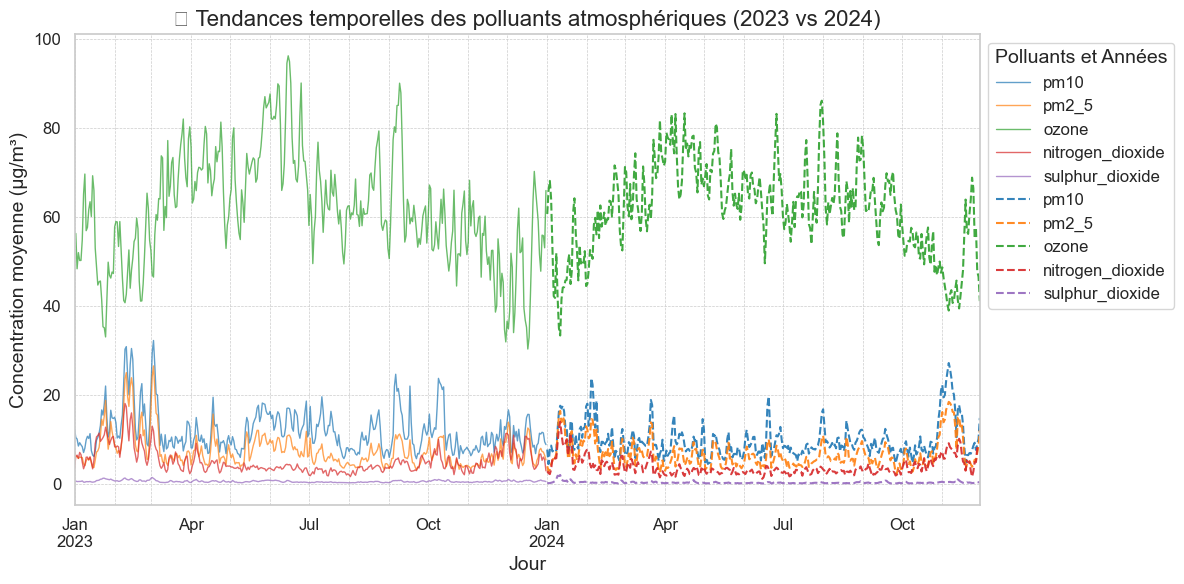

In [40]:
time_trends.index = pd.to_datetime(time_trends.index)
time_trends_2023 = time_trends.loc['2023-01-01':'2023-12-31']
time_trends_2024 = time_trends.loc['2024-01-01':'2024-12-31']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Traçage des tendances pour 2023
time_trends_2023.plot(
    ax=plt.gca(),
    linewidth=1,
    linestyle="-",  # Ligne pleine pour 2023
    alpha=0.7,
    color=sns.color_palette("tab10", n_colors=len(polluants)),
    label=[f"{pollutant} (2023)" for pollutant in polluants]
)
# Traçage des tendances pour 2024
time_trends_2024.plot(
    ax=plt.gca(),
    linewidth=1.5,
    linestyle="--",  # Ligne pointillée pour 2024
    alpha=0.9,
    color=sns.color_palette("tab10", n_colors=len(polluants)),
    label=[f"{pollutant} (2024)" for pollutant in polluants]
)
plt.title("📈 Tendances temporelles des polluants atmosphériques (2023 vs 2024)", fontsize=16)
plt.xlabel("Jour", fontsize=14)
plt.ylabel("Concentration moyenne (µg/m³)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Polluants et Années", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


1. **Ozone (O₃)** :
   - Les concentrations d'ozone suivent une **forte saisonnalité**, atteignant des pics au printemps et en été. 
   - Ces pics pourraient être dus à une augmentation de la photodissociation des polluants en présence de lumière solaire intense.

2. **PM10 et PM2.5** :
   - Les concentrations de particules (PM10 et PM2.5) sont relativement stables sur l'année, avec quelques **pics sporadiques** qui pourraient être liés à des événements ponctuels, comme des feux de forêt, des émissions industrielles, ou des conditions météorologiques spécifiques (vents secs, inversion thermique).
   - Les niveaux sont légèrement plus élevés en hiver, possiblement en raison des émissions provenant du chauffage résidentiel.

3. **Dioxyde d'azote (NO₂)** :
   - Les niveaux de NO₂ sont faibles mais montrent une légère hausse en hiver. Cela pourrait être attribué à une augmentation des émissions liées au transport et au chauffage.

4. **Dioxyde de soufre (SO₂)** :
   - Les concentrations de SO₂ restent très faibles tout au long de l'année. Les faibles émissions pourraient être liées à des régulations strictes sur les combustibles fossiles contenant du soufre.

##### ✨ Comparaison entre 2023 et 2024
- **Tendances générales similaires** :
  - Les deux années montrent des profils de variation similaires, suggérant une cohérence dans les sources d'émission et les conditions météorologiques.
- **Légères différences dans les niveaux de concentration** :
  - Pour certains polluants comme l'ozone, les niveaux de 2024 semblent légèrement inférieurs à ceux de 2023, ce qui pourrait être dû à des variations climatiques ou des politiques environnementales renforcées.

##### 📌 Points Clés à Retenir
- Les concentrations d'ozone présentent une **forte saisonnalité** et des pics marqués en été.
- Les particules fines (PM10 et PM2.5) montrent des **fluctuations ponctuelles** et des niveaux légèrement plus élevés en hiver.
- Les concentrations de NO₂ et SO₂ restent relativement faibles, avec peu de variations notables.

### 🧐 Vérifions si ces tendances sont égalements observées dans chaque région

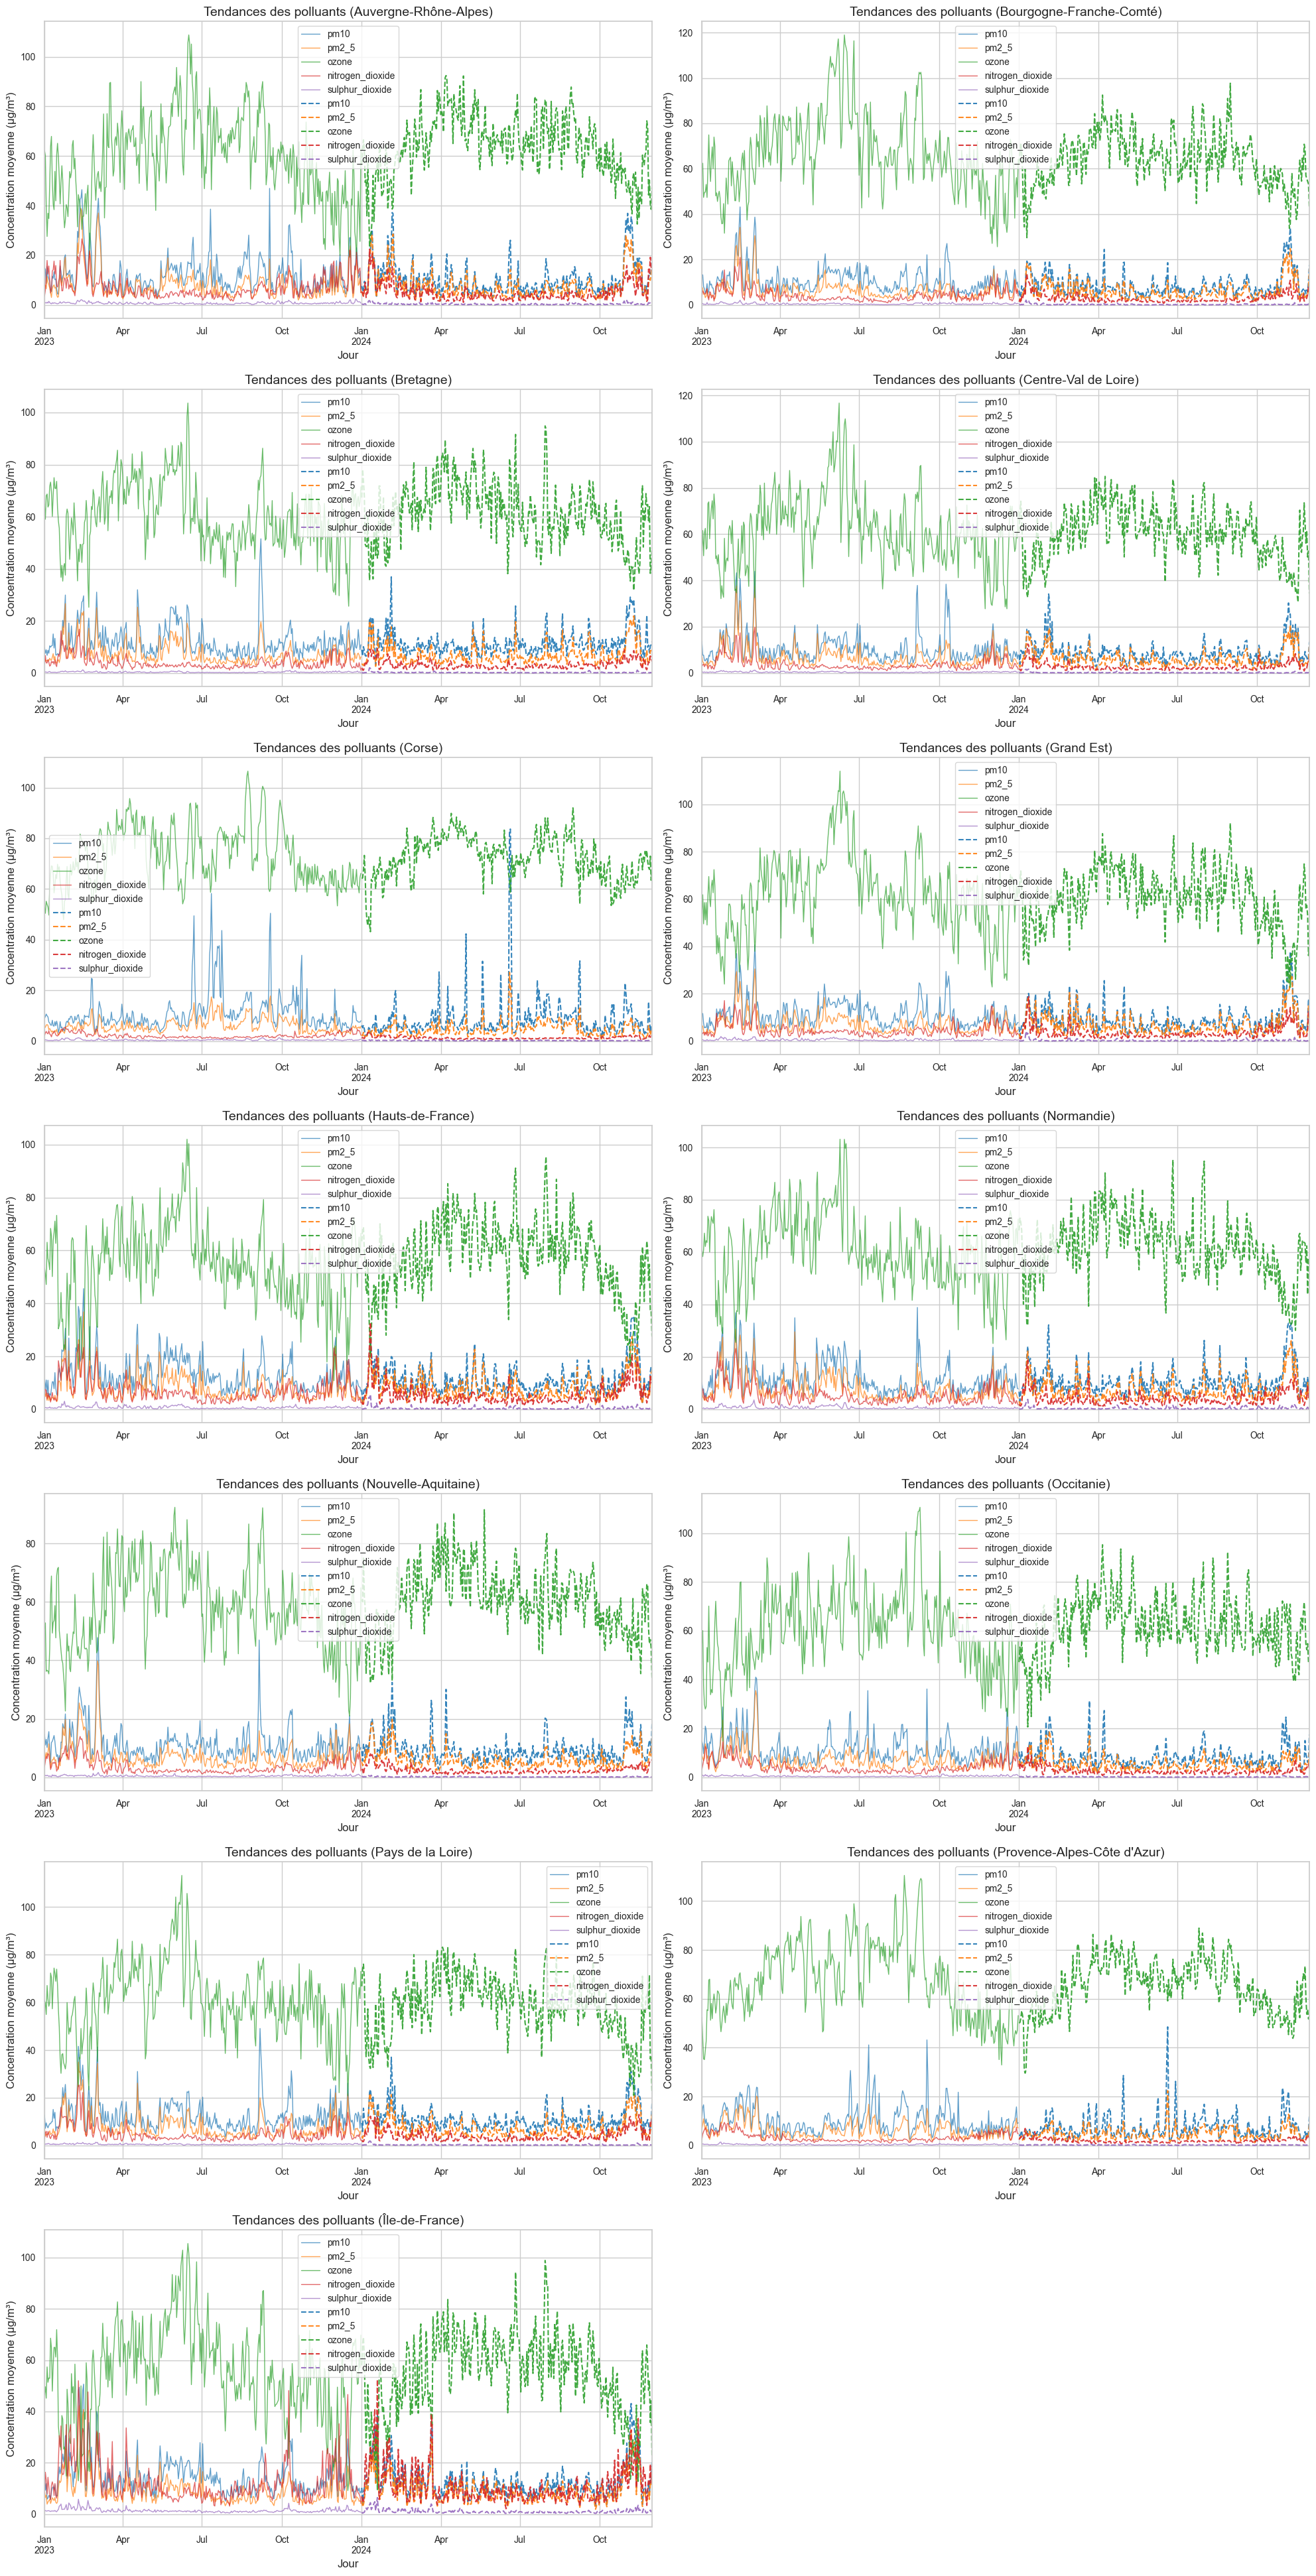

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le DataFrame groupé
time_trends_reg = df_final.groupby(['day', 'region'])[polluants].mean()

# Réinitialiser l'index pour faciliter la manipulation
time_trends_reg = time_trends_reg.reset_index()

# Liste unique des régions
regions = time_trends_reg['region'].unique()

sns.set_theme(style="whitegrid")

# Dimensions des sous-graphiques
fig, axes = plt.subplots(
    nrows=(len(regions) + 1) // 2,  # Calculer le nombre de lignes
    ncols=2,
    figsize=(20, len(regions) * 3)
)
axes = axes.flatten()
for i, region in enumerate(regions):
    # Filtrer les données par région
    region_data = time_trends_reg[time_trends_reg['region'] == region]

    # Filtrer les données par année
    time_trends_2023 = region_data[(region_data['day'].astype("str") >= '2023-01-01') & (region_data['day'].astype("str") <= '2023-12-31')]
    time_trends_2024 = region_data[(region_data['day'].astype("str") >= '2024-01-01') & (region_data['day'].astype("str") <= '2024-12-31')]

    # Traçage des tendances pour 2023
    time_trends_2023.set_index('day')[polluants].plot(
        ax=axes[i],
        linewidth=1,
        linestyle="-",
        alpha=0.7,
        color=sns.color_palette("tab10", n_colors=len(polluants)),
        label=[f"{pollutant} (2023)" for pollutant in polluants]
    )

    # Traçage des tendances pour 2024
    time_trends_2024.set_index('day')[polluants].plot(
        ax=axes[i],
        linewidth=1.5,
        linestyle="--",
        alpha=0.9,
        color=sns.color_palette("tab10", n_colors=len(polluants)),
        label=[f"{pollutant} (2024)" for pollutant in polluants]
    )

    # Ajuster le titre, les axes et la légende
    axes[i].set_title(f"Tendances des polluants ({region})", fontsize=14)
    axes[i].set_xlabel("Jour", fontsize=12)
    axes[i].set_ylabel("Concentration moyenne (µg/m³)", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].legend(fontsize=10)

# Supprimer les axes inutilisés
for j in range(len(regions), len(axes)):
    fig.delaxes(axes[j])

# Ajustement global
plt.tight_layout()
plt.show()


In [42]:
region_data["day"].astype("str")

12      2023-01-01
25      2023-01-02
38      2023-01-03
51      2023-01-04
64      2023-01-05
           ...    
9047    2024-11-26
9060    2024-11-27
9073    2024-11-28
9086    2024-11-29
9099    2024-11-30
Name: day, Length: 700, dtype: object

In [43]:
type("2023-01-01")

str

In [44]:
df1

day  month                region                      date  \
0     2023-01-01      1  Auvergne-Rhône-Alpes 2023-01-01 11:30:00+00:00   
18    2023-01-02      1  Auvergne-Rhône-Alpes 2023-01-02 11:30:00+00:00   
36    2023-01-03      1  Auvergne-Rhône-Alpes 2023-01-03 11:30:00+00:00   
54    2023-01-04      1  Auvergne-Rhône-Alpes 2023-01-04 11:30:00+00:00   
72    2023-01-05      1  Auvergne-Rhône-Alpes 2023-01-05 11:30:00+00:00   
...          ...    ...                   ...                       ...   
12527 2024-11-26     11         Île-de-France 2024-11-26 11:30:00+00:00   
12545 2024-11-27     11         Île-de-France 2024-11-27 11:30:00+00:00   
12563 2024-11-28     11         Île-de-France 2024-11-28 11:30:00+00:00   
12581 2024-11-29     11         Île-de-France 2024-11-29 11:30:00+00:00   
12599 2024-11-30     11         Île-de-France 2024-11-30 11:30:00+00:00   

       longitude   latitude       pm10      pm2_5  nitrogen_dioxide  \
0       4.536119  45.514642  14.954166   7.858334          3.475000   
18      4.536119  45.514642  14.316667   7.962500          5.904167   
36      4.536119  45.514642   8.666667   6.525000         11.420834   
54      4.536119  45.514642  15.504167  11.441667         17.929167   
72      4.536119  45.514642  11.616666   9.070833         12.416667   
...          ...        ...        ...        ...               ...   
12527   2.503401  48.709316  12.691667   8.512500         13.220833   
12545   2.503401  48.709316   7.362500   5.725000         11.762500   
12563   2.503401  48.709316  14.870833  12.295834         19.445833   
12581   2.503401  48.709316  14.041667  11.537499         12.087501   
12599   2.503401  48.709316  20.308332  17.858334         17.637501   

       sulphur_dioxide      ozone  longitude   latitude  temperature_2m  \
0             0.837500  62.250000   4.536119  45.514642       11.954083   
18            0.933333  60.208332   4.536119  45.514642       10.583250   
36            0.729167  39.916668   4.536119  45.514642        6.727000   
54            1.075000  27.583334   4.536119  45.514642        5.220750   
72            0.725000  36.916668   4.536119  45.514642        7.531167   
...                ...        ...        ...        ...             ...   
12527         0.916667  48.250000   2.503401  48.709316        8.658334   
12545         0.775000  51.750000   2.503401  48.709316       10.439584   
12563         1.537500  35.708332   2.503401  48.709316        6.358334   
12581         0.920833  44.166668   2.503401  48.709316        3.558333   
12599         1.420833  22.916666   2.503401  48.709316        2.770833   

       relative_humidity_2m  precipitation  surface_pressure  wind_speed_10m  
0                 71.024551       0.000000        964.791809       23.574928  
18                76.024849       0.550000        965.794250       15.330505  
36                87.053253       0.125000        971.449707        5.034335  
54                84.029167       0.000000        972.121399        4.557892  
72                89.476860       0.016667        968.975586        5.073804  
...                     ...            ...               ...             ...  
12527             88.946800       0.108333       1014.152649       11.292778  
12545             91.109230       0.254167       1012.352295       17.599253  
12563             84.380318       0.004167       1022.028015        6.830119  
12581             85.608681       0.000000       1023.345276        9.613878  
12599             90.716217       0.000000       1021.944885        4.865319  

[9100 rows x 18 columns]

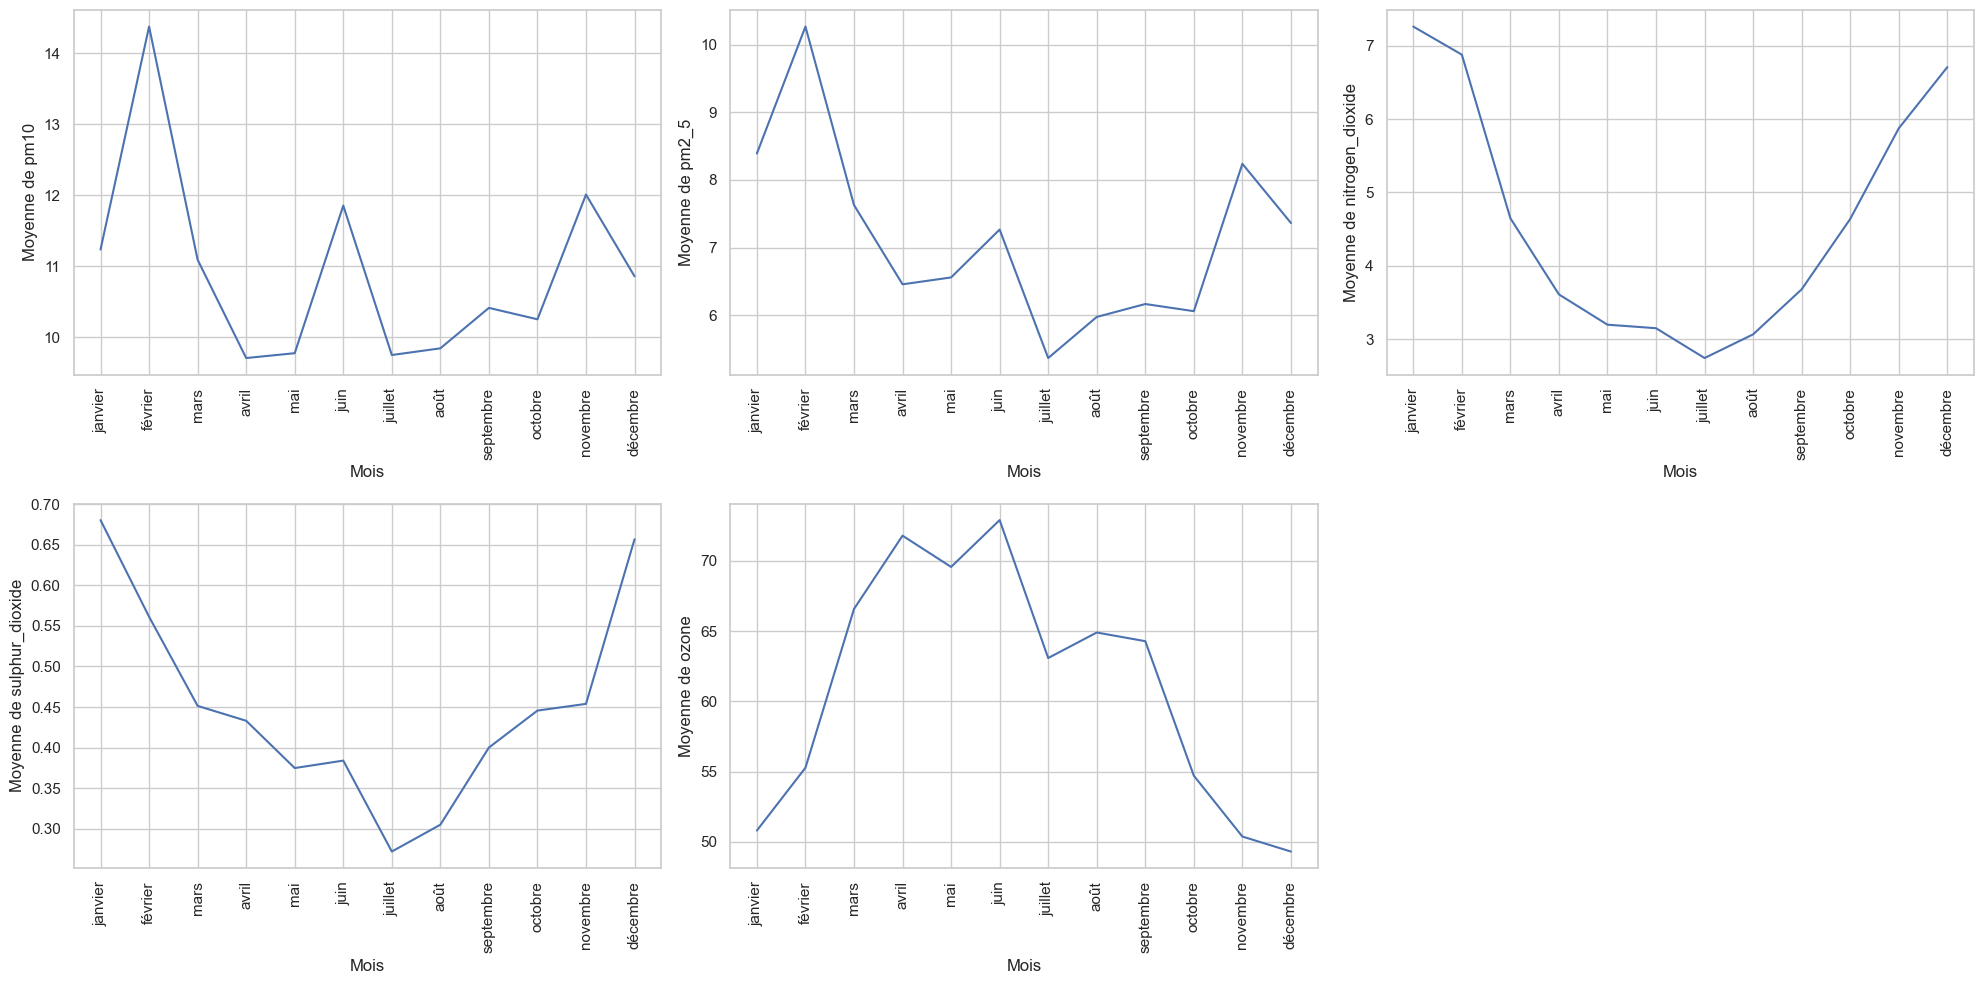

In [45]:
import seaborn as sns
variables_air_month=["pm10", "pm2_5", "nitrogen_dioxide", "sulphur_dioxide", "ozone","month"]
df_air_month=df1[variables_air_month].groupby("month").mean()

# Initialiser une figure pour afficher les graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Afficher un graphique pour chaque variable
for i, column in enumerate(df_air_month):
    ax = axes[i//3, i%3]
    sns.lineplot(x=df_air_month.index, y=df_air_month[column], ax=ax)
    #axes[i].set_title(f'Moyenne de {column} par mois')
    ax.set_xlabel('Mois')
    ax.set_ylabel(f'Moyenne de {column}')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(df_air_month.index)  # Définit les ticks de l'axe des X aux valeurs des mois
    ax.set_xticklabels([month_dict[m] for m in df_air_month.index])


# Masquer le dernier cadre inutilisé
axes[-1, -1].set_visible(False)
    
# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [46]:
variables_air_region=["pm10", "pm2_5", "nitrogen_dioxide", "sulphur_dioxide", "ozone","region","longitude","latitude"]
df_air_region=df_final[variables_air_region].groupby(["region"]).mean()


In [47]:
df_air_region

pm10     pm2_5  nitrogen_dioxide  \
region                                                              
Auvergne-Rhône-Alpes        11.391398  8.019738          6.163274   
Bourgogne-Franche-Comté      9.689458  6.438536          3.534101   
Bretagne                    11.905880  7.311768          3.597988   
Centre-Val de Loire          9.917185  6.694089          3.169827   
Corse                        9.848196  5.443572          1.727952   
Grand Est                   10.403630  7.027137          4.012548   
Hauts-de-France             12.268559  8.227059          6.272761   
Normandie                   11.407137  7.601459          4.785083   
Nouvelle-Aquitaine          10.411905  6.652667          3.004595   
Occitanie                   10.052964  6.451458          3.409214   
Pays de la Loire            11.940191  7.588369          4.541827   
Provence-Alpes-Côte d'Azur   8.852309  5.616756          2.604155   
Île-de-France               13.709042  9.406375         11.921513   

                            sulphur_dioxide      ozone  longitude  longitude  \
region                                                                         
Auvergne-Rhône-Alpes               0.549964  61.291965   4.536119   4.536119   
Bourgogne-Franche-Comté            0.337881  65.474525   4.806857   4.806857   
Bretagne                           0.318262  60.775654  -2.841463  -2.841463   
Centre-Val de Loire                0.282143  60.993690   1.684391   1.684391   
Corse                              0.332905  72.720779   9.106152   9.106152   
Grand Est                          0.412583  61.399883   5.613112   5.613112   
Hauts-de-France                    0.555869  55.656250   2.771303   2.771303   
Normandie                          0.499726  60.985420   0.110932   0.110932   
Nouvelle-Aquitaine                 0.309143  59.442322   0.212719   0.212719   
Occitanie                          0.315976  61.131668   2.143923   2.143923   
Pays de la Loire                   0.386280  59.968277  -0.816786  -0.816786   
Provence-Alpes-Côte d'Azur         0.260893  66.594048   6.061005   6.061005   
Île-de-France                      1.185018  55.022560   2.503401   2.503401   

                             latitude   latitude  
region                                            
Auvergne-Rhône-Alpes        45.514642  45.514642  
Bourgogne-Franche-Comté     47.234282  47.234282  
Bretagne                    48.177549  48.177549  
Centre-Val de Loire         47.484775  47.484775  
Corse                       42.151511  42.151511  
Grand Est                   48.688977  48.688977  
Hauts-de-France             49.969594  49.969594  
Normandie                   49.120067  49.120067  
Nouvelle-Aquitaine          45.206040  45.206040  
Occitanie                   43.702500  43.702500  
Pays de la Loire            47.478104  47.478104  
Provence-Alpes-Côte d'Azur  43.958789  43.958789  
Île-de-France               48.709316  48.709316

In [48]:
df_air_region["LIBELLE_REGION"] = df_air_region.index
gd=france.merge(df_air_region, on="LIBELLE_REGION",how="inner")

In [49]:
gd=gd.to_crs(3857)

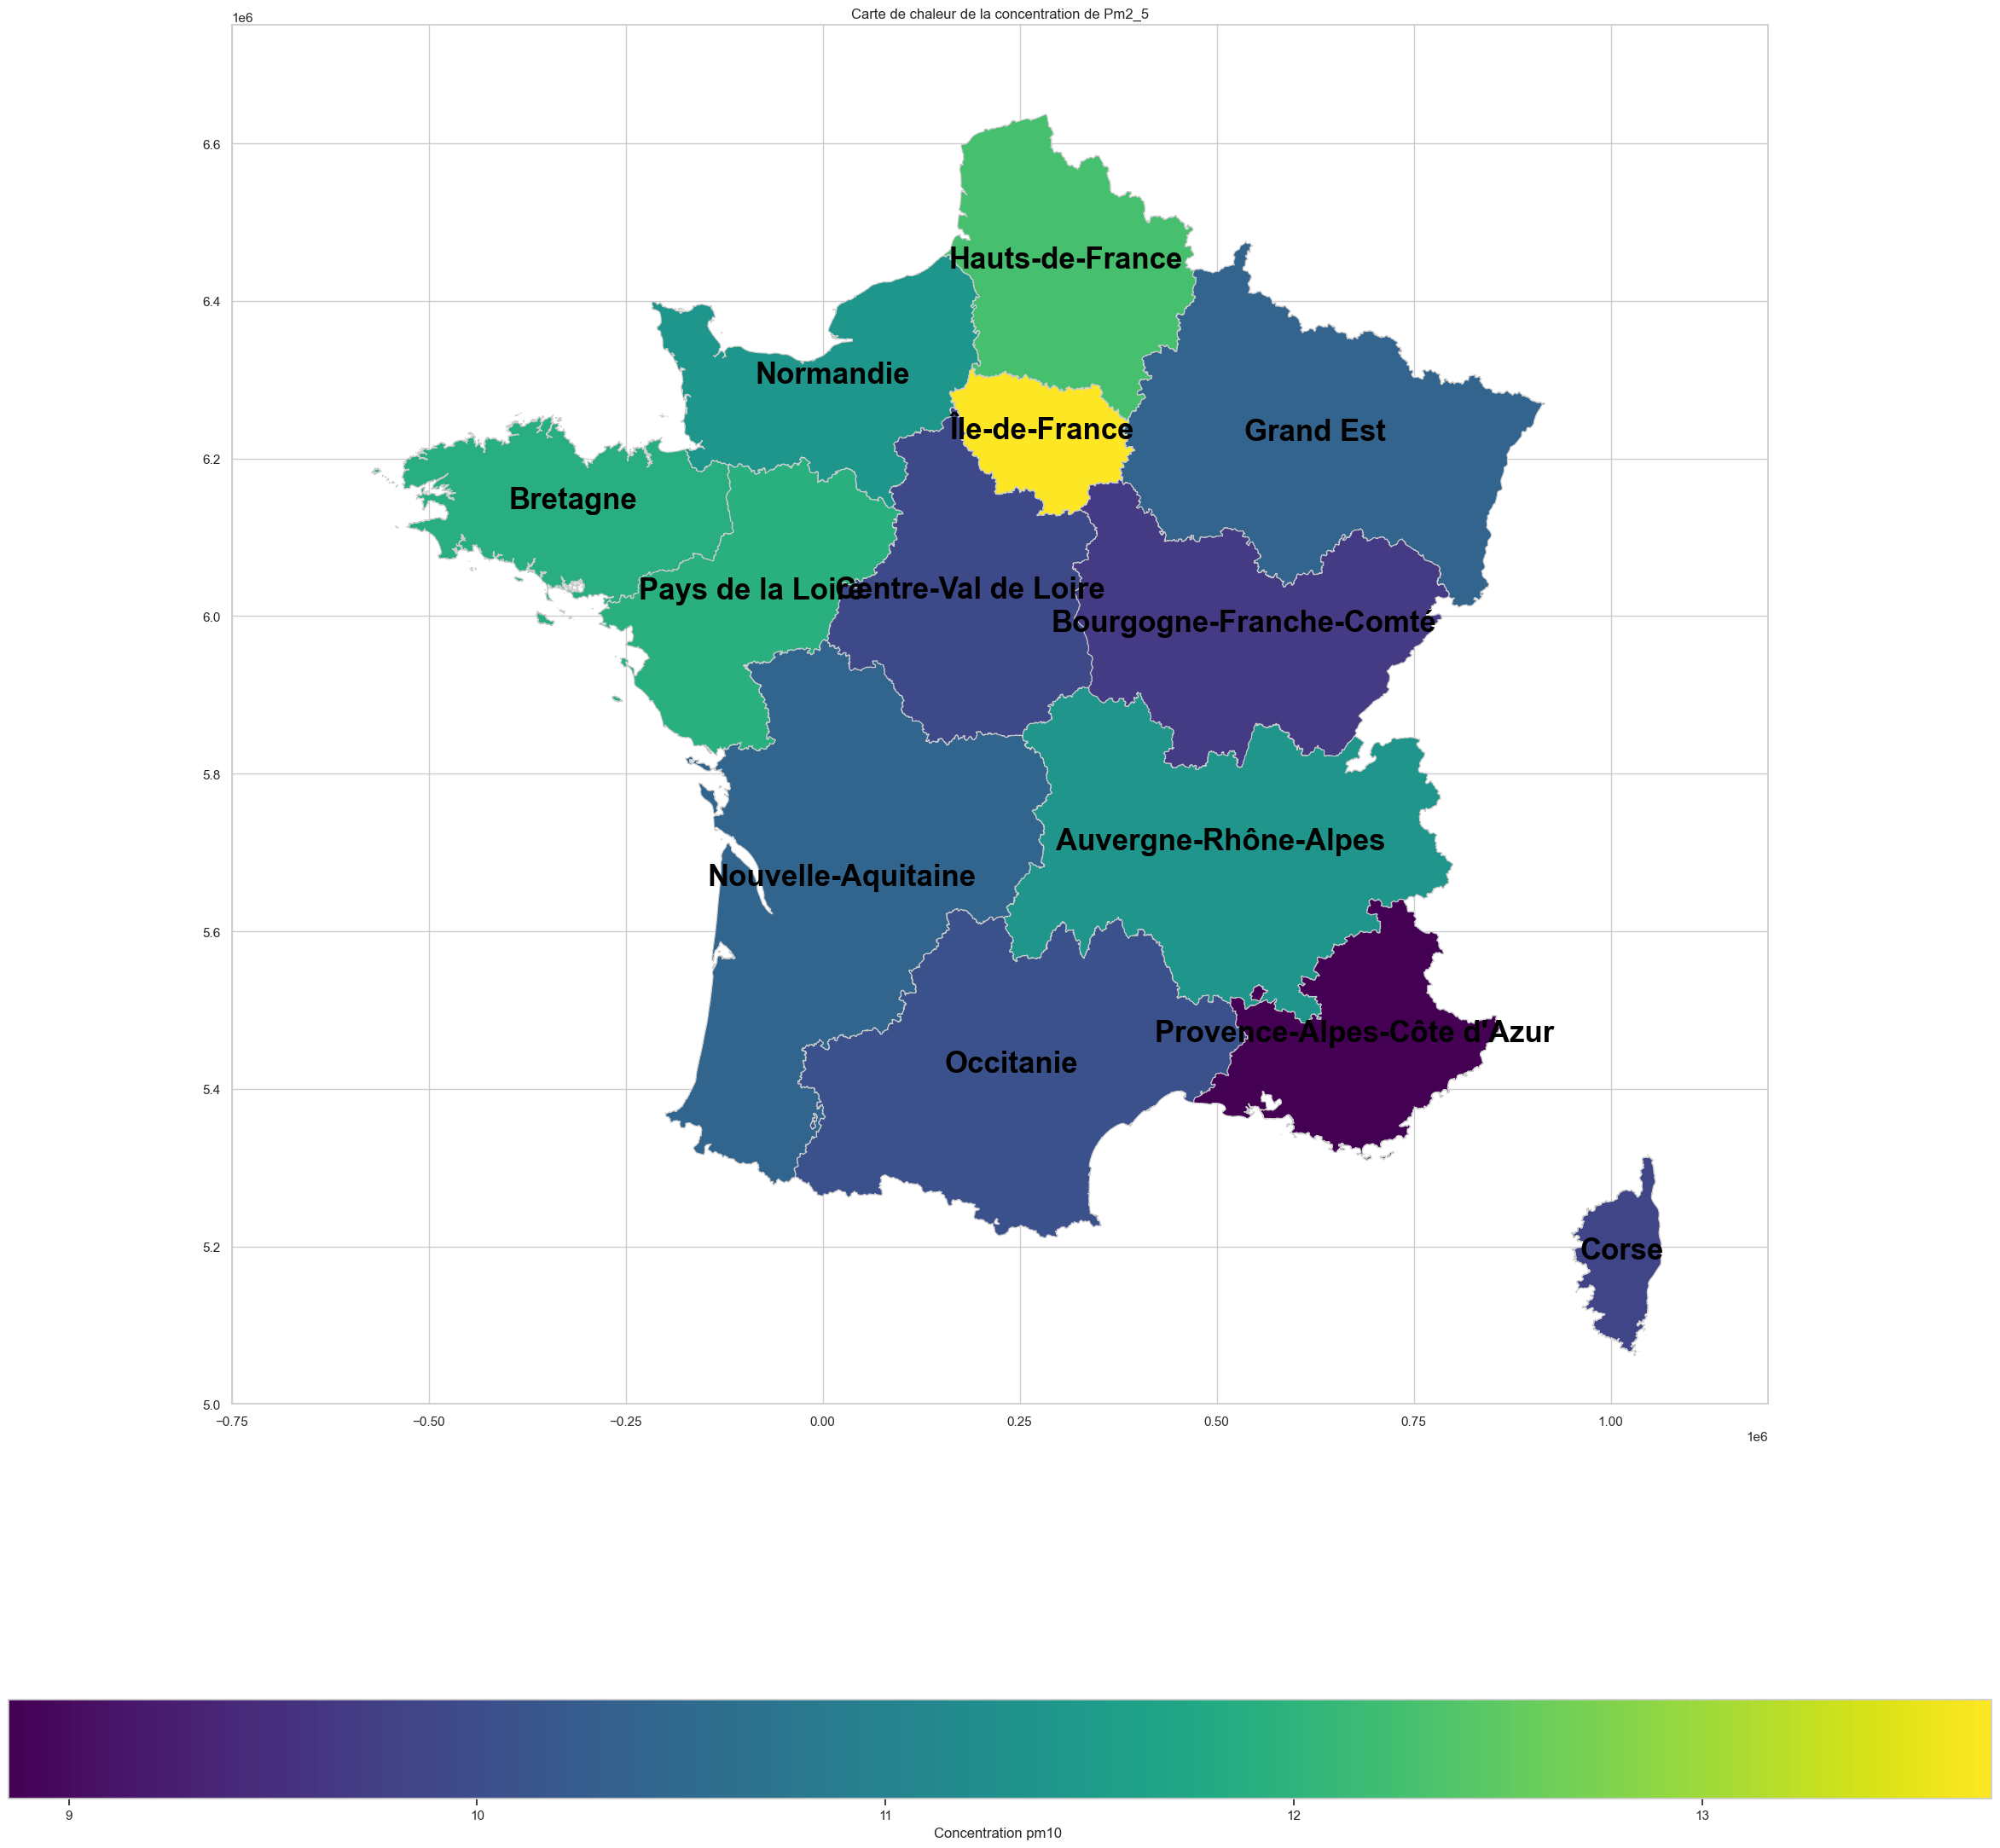

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# Définir la palette de couleurs et la normalisation pour la variable
norm = mpl.colors.Normalize(vmin=gd['pm10'].min(), vmax=gd['pm10'].max())
cmap = plt.cm.viridis  # Choisissez votre palette de couleurs (par ex. viridis, plasma, etc.)

# Afficher la carte avec la coloration proportionnelle à la concentration de NO2

gd.plot(column='pm10', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, legend_kwds={'label': "Concentration pm10 ", 'orientation': "horizontal"})
# Ajuster les limites de l'axe pour que le cadre soit centré sur les géométries
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#ax.set_xlim(bounds[0], bounds[2])  # minx, maxx
#ax.set_ylim(bounds[1], bounds[3])  # miny, maxy
# Ajouter un titre
ax.set_title("Carte de chaleur de la concentration de Pm2_5")

for idx, row in gd.iterrows():
    #Récupérer le centroïde de chaque région pour le positionner correctement
    centroid = row['geometry'].centroid
    #Ajouter le nom de la région au centroïde de la géométrie
    ax.text(centroid.x, centroid.y, row['LIBELLE_REGION'], fontsize=25, ha='center', color='black', weight='bold')

# Afficher la carte
plt.show()

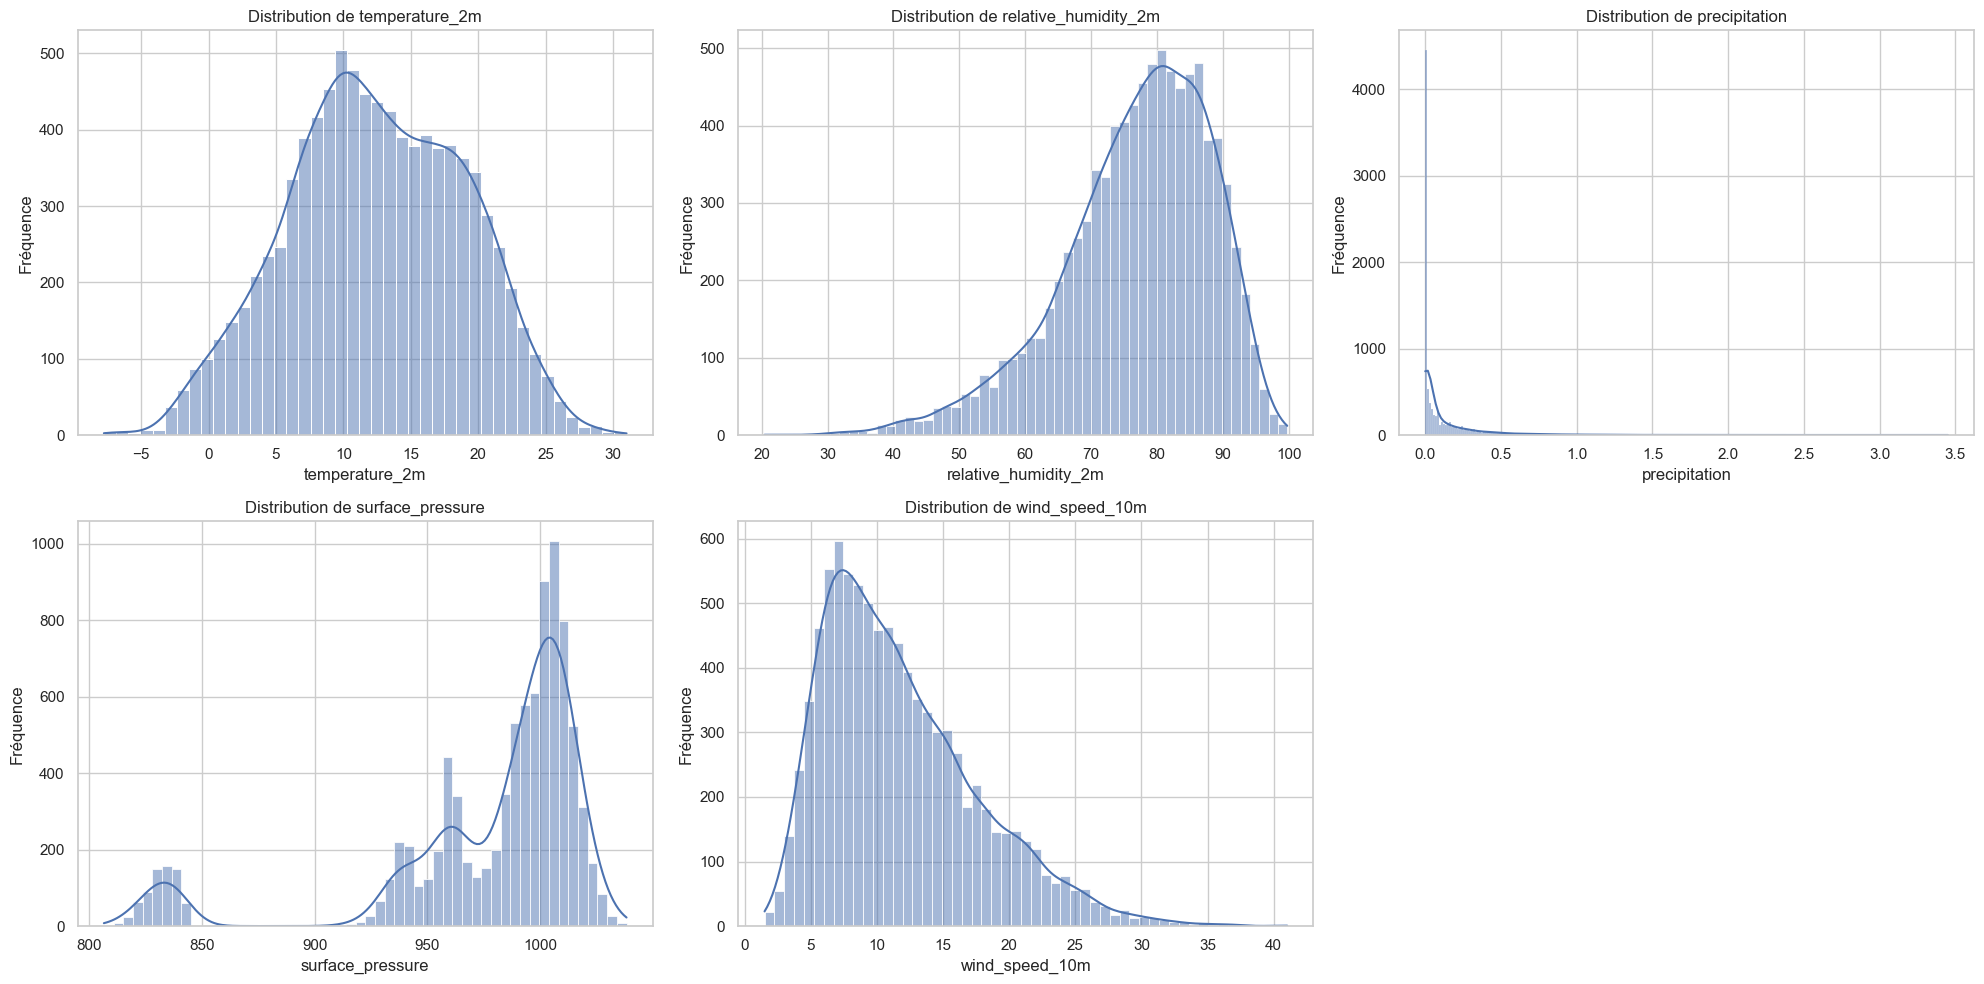

In [51]:
import math
#Liste des variables d'intérêt
var_climat = ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]

# Calcul du nombre de lignes et colonnes nécessaires
n_vars = len(var_climat)
n_cols = 3  # Nombre de colonnes souhaité
n_rows = math.ceil(n_vars / n_cols)  # Calculer dynamiquement le nombre de lignes

# Initialiser une figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Aplatir les axes pour itérer facilement (si n_rows > 1)
axes = axes.flatten()

# Boucle pour créer un histogramme pour chaque variable
for i, variable in enumerate(var_climat):
    sns.histplot(data=df_final, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution de {variable}")
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("Fréquence")

# Masquer les axes inutilisés (s'il y en a)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Matrice de Corrélation')

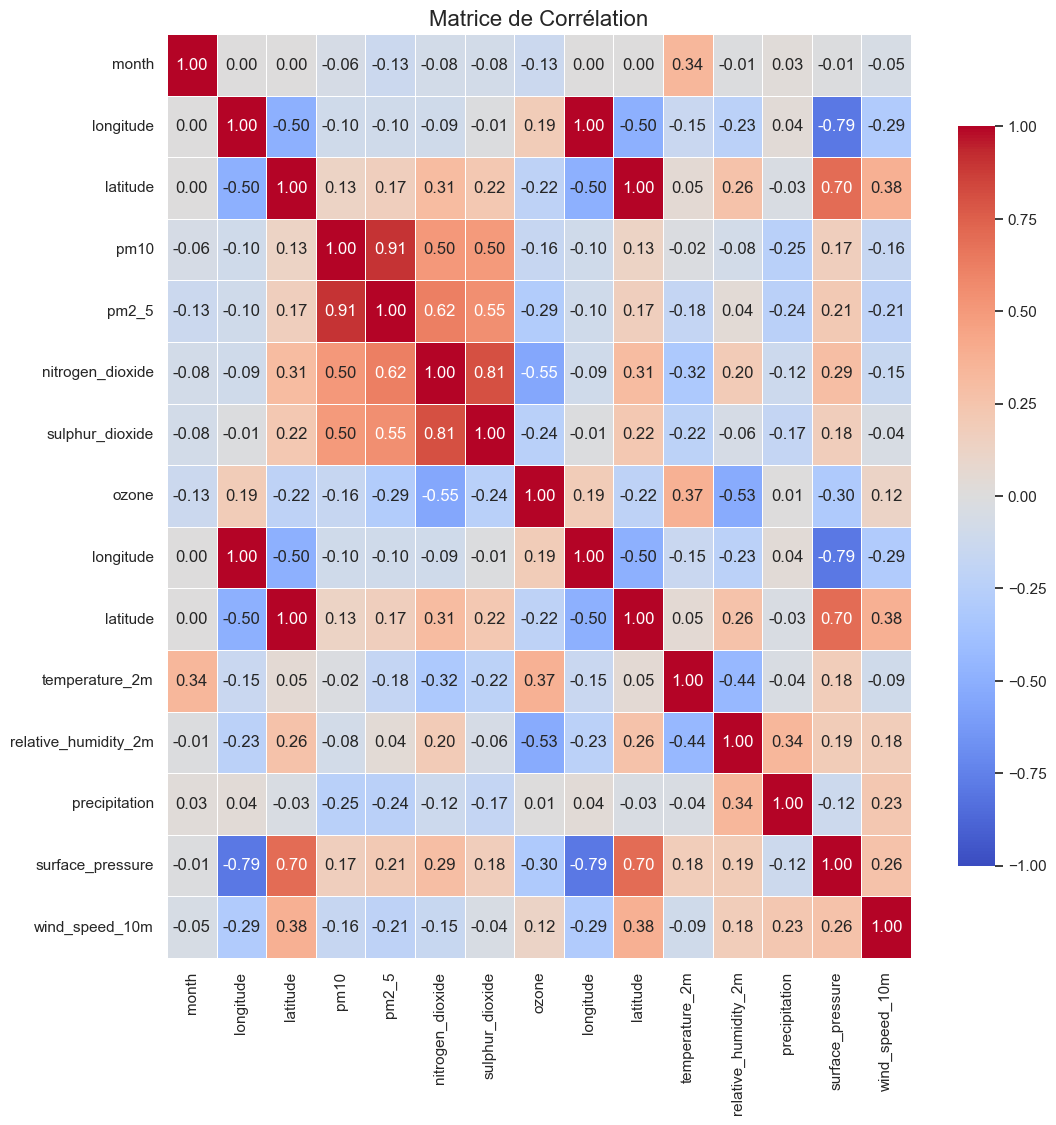

In [52]:
import numpy as np
corr_matrix = df_final.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 12))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})

# Titre
plt.title('Matrice de Corrélation', fontsize=16)

In [53]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
df_idf = df_final[df_final["region"]=="Île-de-France"]
df_idf

day  month         region                      date  longitude  \
17    2023-01-01      1  Île-de-France 2023-01-01 11:30:00+00:00   2.503401   
35    2023-01-02      1  Île-de-France 2023-01-02 11:30:00+00:00   2.503401   
53    2023-01-03      1  Île-de-France 2023-01-03 11:30:00+00:00   2.503401   
71    2023-01-04      1  Île-de-France 2023-01-04 11:30:00+00:00   2.503401   
89    2023-01-05      1  Île-de-France 2023-01-05 11:30:00+00:00   2.503401   
...          ...    ...            ...                       ...        ...   
12527 2024-11-26     11  Île-de-France 2024-11-26 11:30:00+00:00   2.503401   
12545 2024-11-27     11  Île-de-France 2024-11-27 11:30:00+00:00   2.503401   
12563 2024-11-28     11  Île-de-France 2024-11-28 11:30:00+00:00   2.503401   
12581 2024-11-29     11  Île-de-France 2024-11-29 11:30:00+00:00   2.503401   
12599 2024-11-30     11  Île-de-France 2024-11-30 11:30:00+00:00   2.503401   

        latitude       pm10      pm2_5  nitrogen_dioxide  sulphur_dioxide  \
17     48.709316  15.383334   9.358334          7.616667         1.375000   
35     48.709316   9.312500   6.445833         16.291666         1.337500   
53     48.709316  11.849999   7.379167         13.200000         1.141667   
71     48.709316   5.800000   3.862500          7.841667         1.187500   
89     48.709316   6.237500   4.679166         14.345833         1.300000   
...          ...        ...        ...               ...              ...   
12527  48.709316  12.691667   8.512500         13.220833         0.916667   
12545  48.709316   7.362500   5.725000         11.762500         0.775000   
12563  48.709316  14.870833  12.295834         19.445833         1.537500   
12581  48.709316  14.041667  11.537499         12.087501         0.920833   
12599  48.709316  20.308332  17.858334         17.637501         1.420833   

           ozone  longitude   latitude  temperature_2m  relative_humidity_2m  \
17     46.500000   2.503401  48.709316       13.652084             71.534920   
35     49.625000   2.503401  48.709316       10.062500             89.010780   
53     45.166668   2.503401  48.709316        7.752083             91.482140   
71     57.375000   2.503401  48.709316       11.695834             89.660561   
89     51.375000   2.503401  48.709316       12.356251             88.560097   
...          ...        ...        ...             ...                   ...   
12527  48.250000   2.503401  48.709316        8.658334             88.946800   
12545  51.750000   2.503401  48.709316       10.439584             91.109230   
12563  35.708332   2.503401  48.709316        6.358334             84.380318   
12581  44.166668   2.503401  48.709316        3.558333             85.608681   
12599  22.916666   2.503401  48.709316        2.770833             90.716217   

       precipitation  surface_pressure  wind_speed_10m  
17          0.079167       1009.788025       19.753124  
35          0.404167       1015.033752       13.947431  
53          0.062500       1022.744385       16.570414  
71          0.112500       1019.289001       25.613174  
89          0.020833       1019.476074       15.305164  
...              ...               ...             ...  
12527       0.108333       1014.152649       11.292778  
12545       0.254167       1012.352295       17.599253  
12563       0.004167       1022.028015        6.830119  
12581       0.000000       1023.345276        9.613878  
12599       0.000000       1021.944885        4.865319  

[700 rows x 18 columns]

In [55]:
###  juste pour tester les fonctions suivantes car "base finale" dérange plus haut
#df=df.drop(columns="carbon_dioxide")
#df_idf = df1[df1["region"]=="Île-de-France"]
#df_idf

In [56]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
df_idf.shape

(700, 18)

In [58]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_idf["pm10"])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistic: -4.543861303729894
P-Value: 0.00016370672299803759


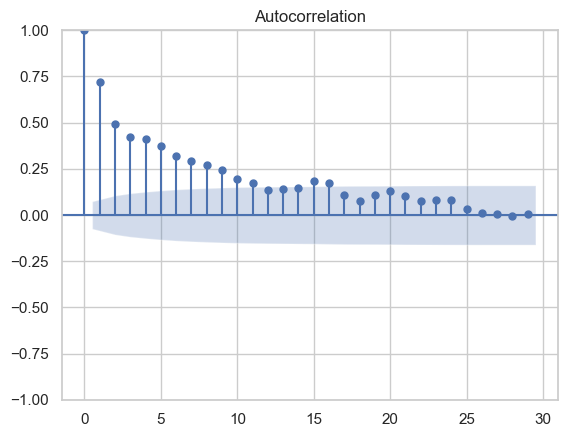

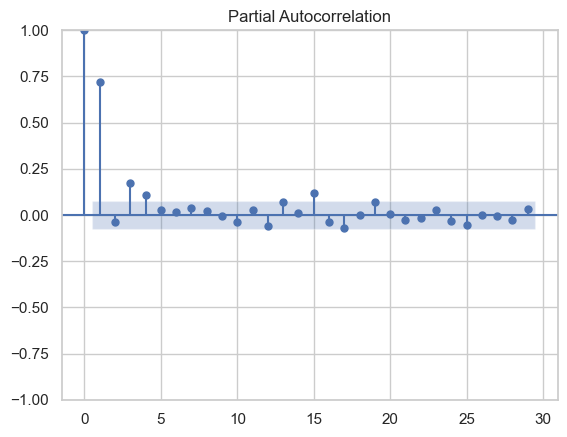

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_idf["pm10"])
plot_pacf(df_idf["pm10"])
plt.show()

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


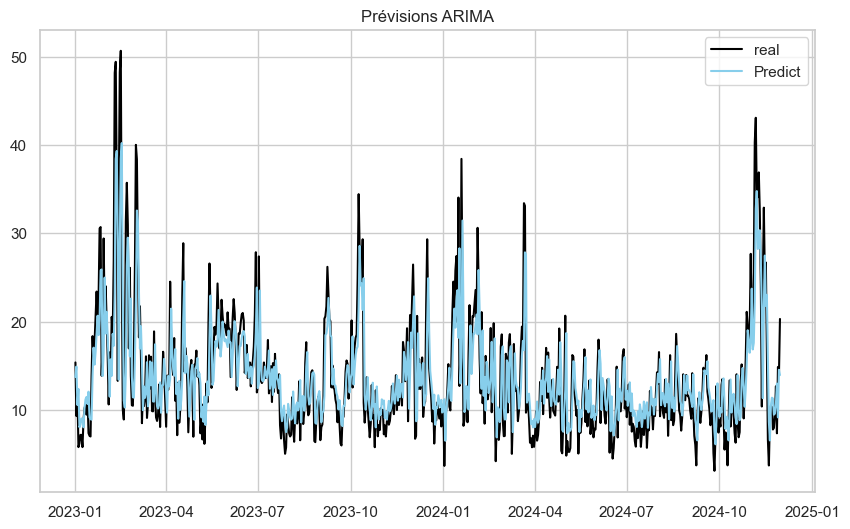

In [60]:
# ARIMA LİBRARY
from statsmodels.tsa.arima.model import ARIMA
#from pandas import datetime

# fit model
model = ARIMA(df_idf["pm10"], order=(1,0,0)) 
model_fit = model.fit()

#prediction
plt.figure(figsize=(10, 6))
plt.plot(df_idf["day"],df_idf["pm10"], label="real",color="black")
plt.plot(df_idf["day"],model_fit.predict(), label="Predict", color='skyblue')
plt.title("Prévisions ARIMA")
plt.legend()
plt.show()


c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


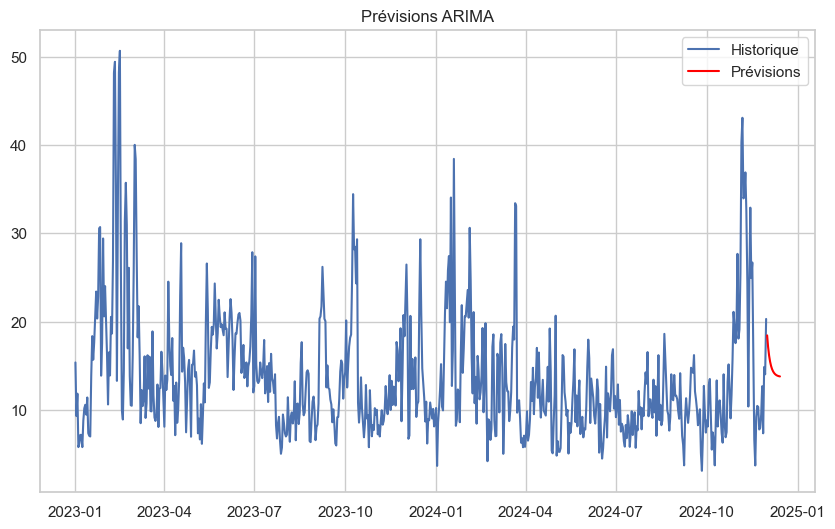

In [61]:
#forecast
forecast_steps = 14 #2semaines
forecast = model_fit.forecast(steps=forecast_steps)
# Visualisation des prévisions
plt.figure(figsize=(10, 6))
plt.plot(df_idf["day"],df_idf["pm10"], label="Historique")
plt.plot(pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:], 
         forecast, label="Prévisions", color='red')
plt.title("Prévisions ARIMA")
plt.legend()
plt.show()

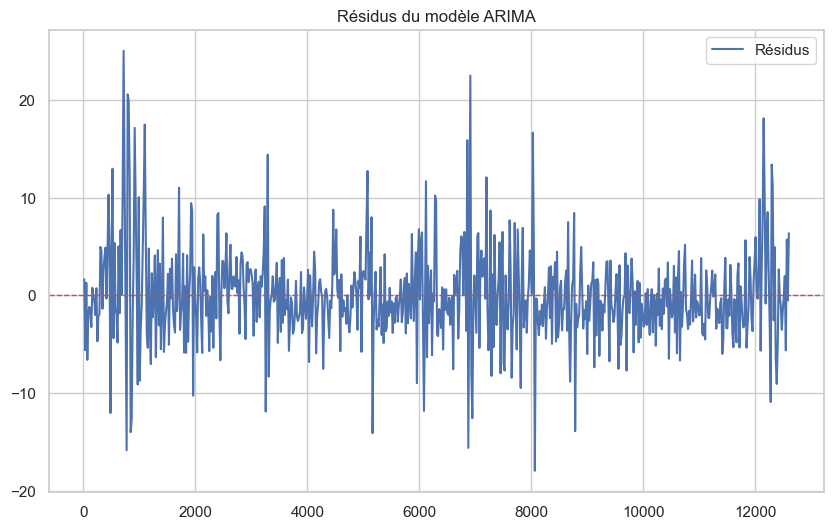

In [62]:
# Visualisation des résidus
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Résidus")
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Résidus du modèle ARIMA")
plt.legend()
plt.show()

In [63]:
import importlib
from scripts import modele  # Supposez que votre module est `scripts.api`

# Rechargez le module
importlib.reload(modele)

<module 'scripts.modele' from 'c:\\Users\\steph\\Documents\\ENSAE\\Python pour la data science\\Projet_Python_2024-1\\scripts\\modele.py'>

### ARIMA pm10

La série est stationnaire.


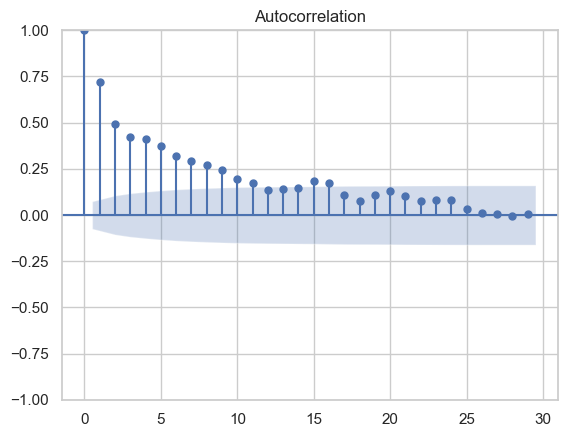

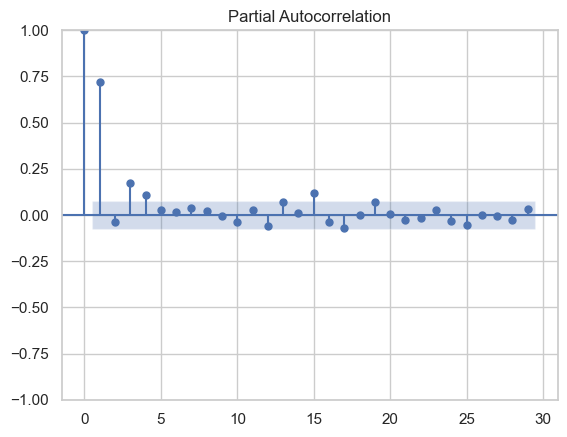

In [64]:

from scripts import modele
modele.stationarity_acf(df_idf,"pm10")



c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


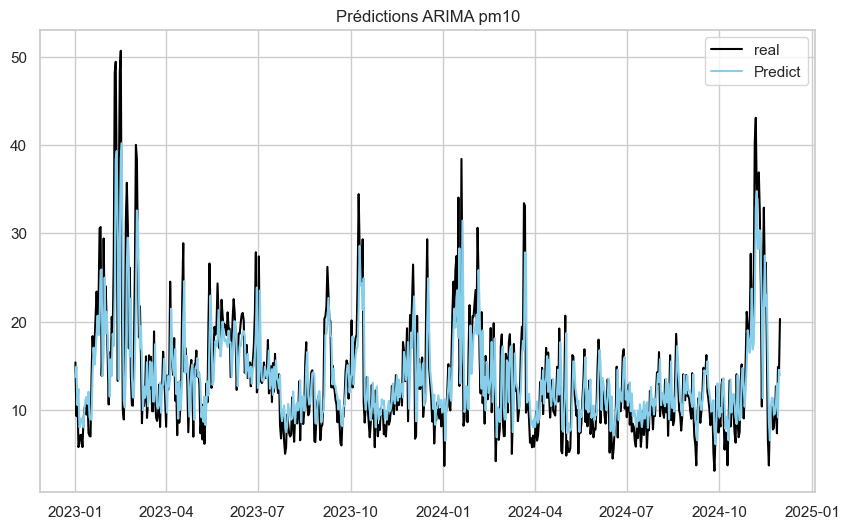

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


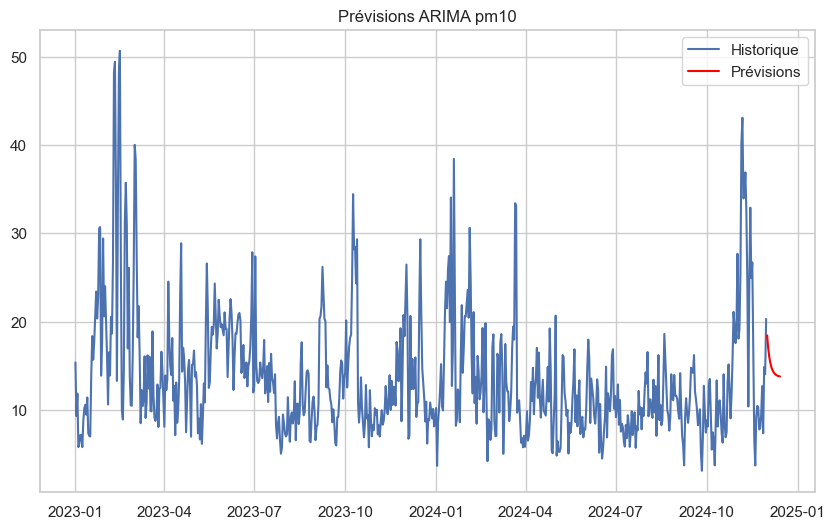

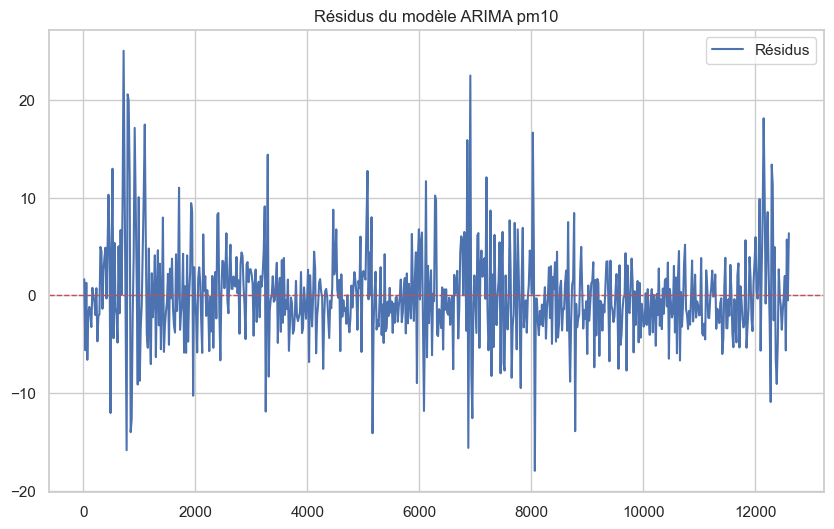

In [181]:
model_fit_pm10 = modele.fit_arima(df_idf,"pm10",1,0,0)
modele.prediction_arima(df_idf,"pm10",model_fit_pm10)
forecast_pm10 = modele.prevision_arima(df_idf,"pm10",model_fit_pm10)
modele.residus(df_idf,"pm10",model_fit_pm10)

### ARIMA pm2_5

La série est stationnaire.


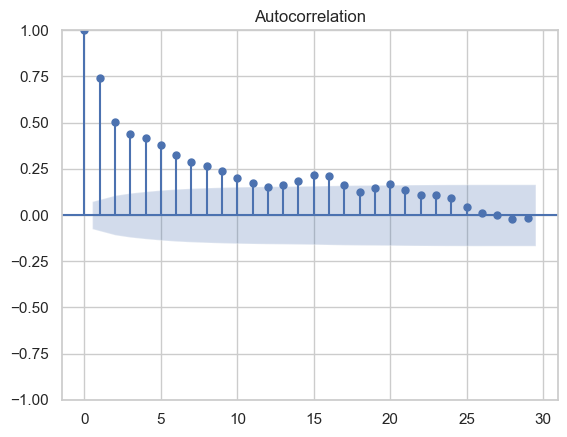

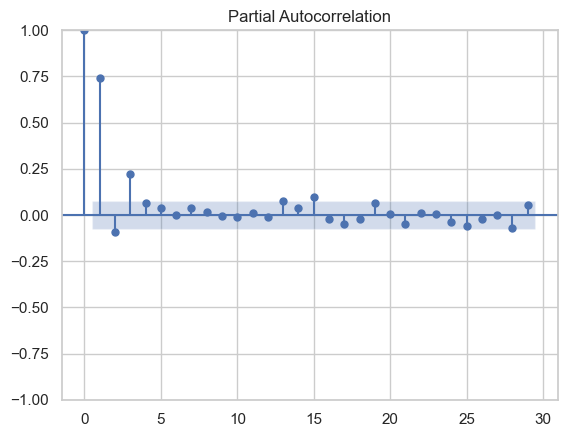

In [179]:

from scripts import modele
modele.stationarity_acf(df_idf,"pm2_5")



c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


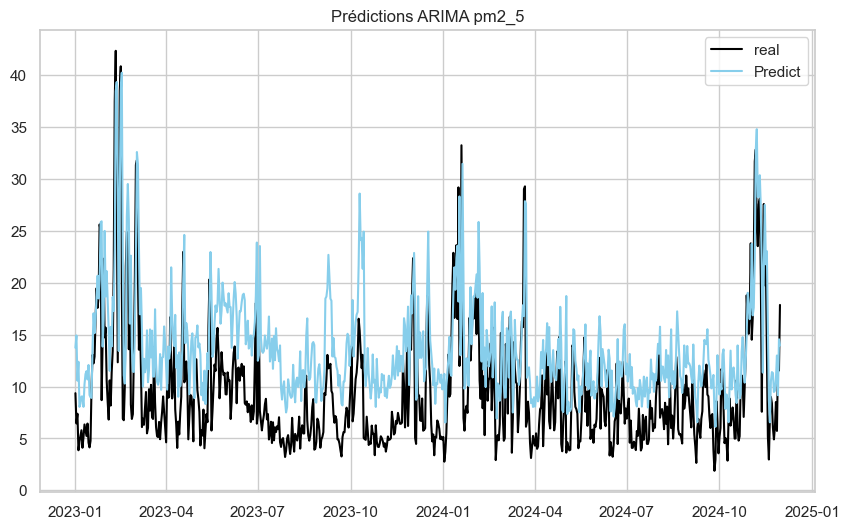

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


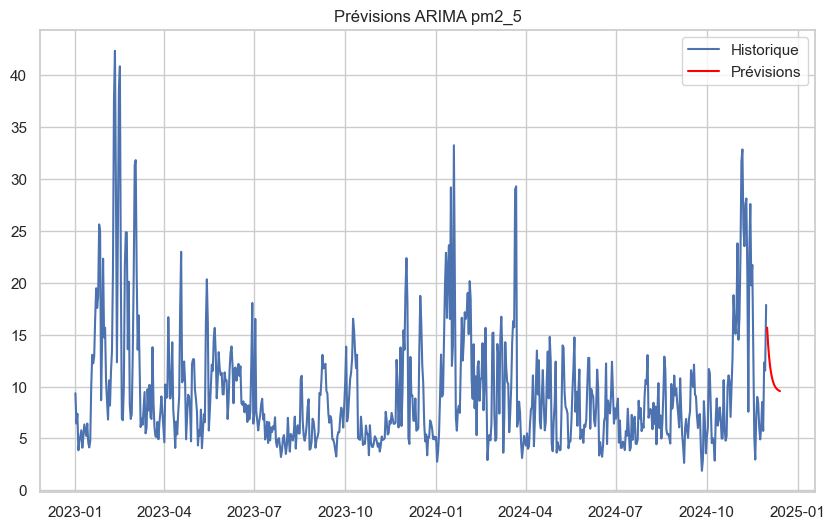

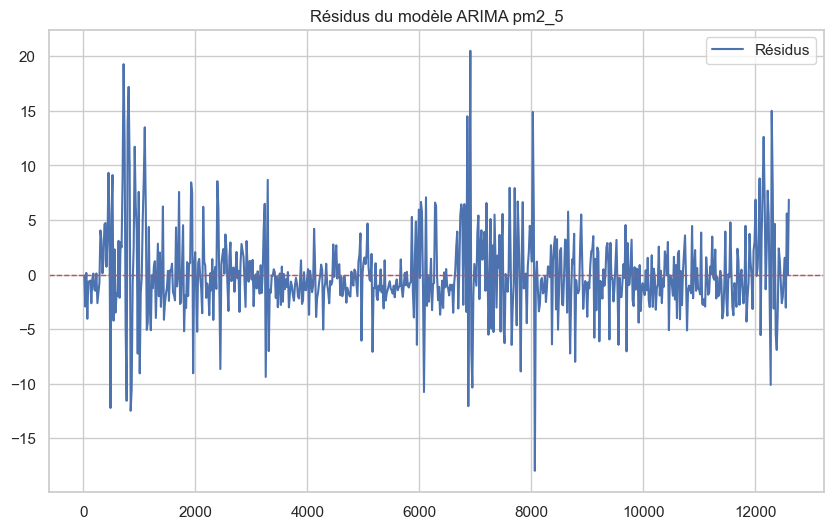

In [182]:
model_fit_pm2_5 = modele.fit_arima(df_idf,"pm2_5",1,0,0)
modele.prediction_arima(df_idf,"pm2_5",model_fit_pm10)
forecast_pm2_5 = modele.prevision_arima(df_idf,"pm2_5",model_fit_pm2_5)
modele.residus(df_idf,"pm2_5",model_fit_pm2_5)

### ARIMA ozone

La série est stationnaire.


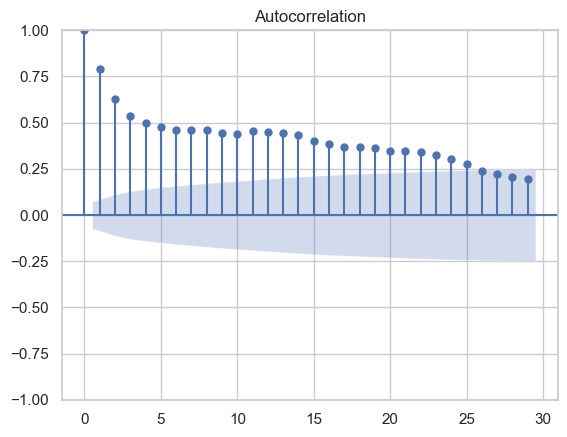

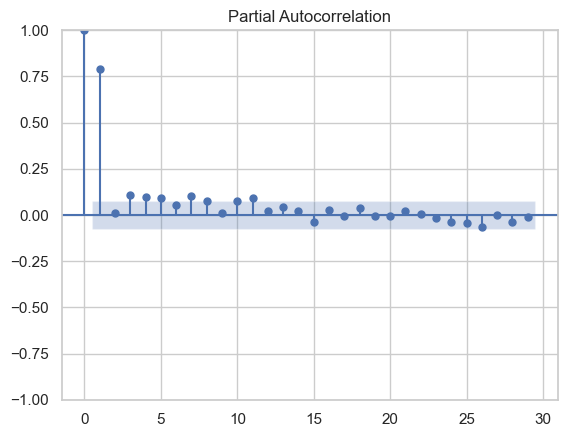

In [187]:

from scripts import modele
modele.stationarity_acf(df_idf,"ozone")



c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


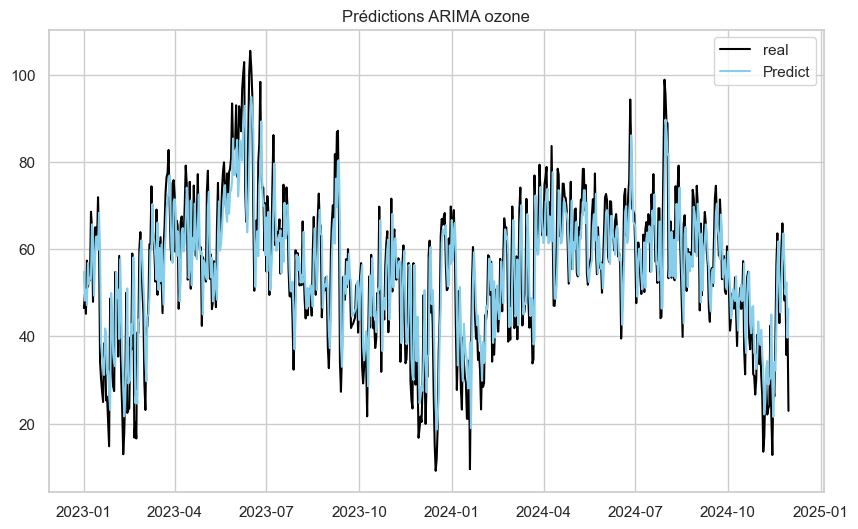

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


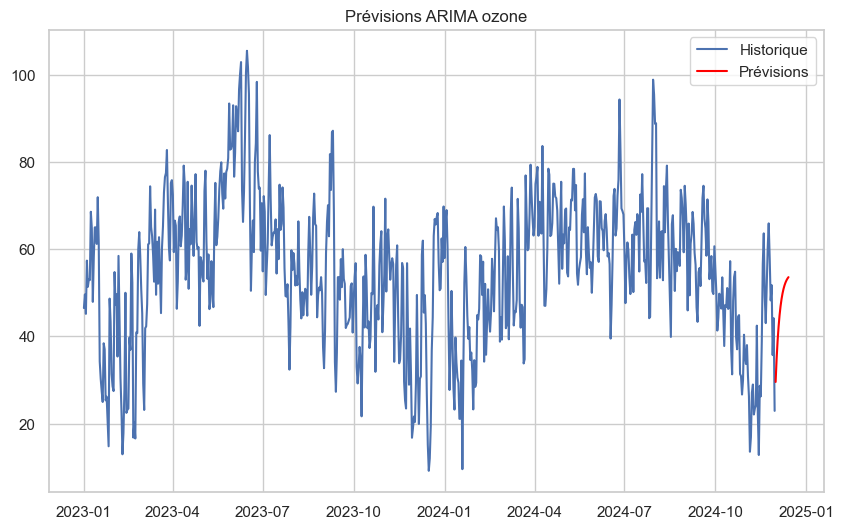

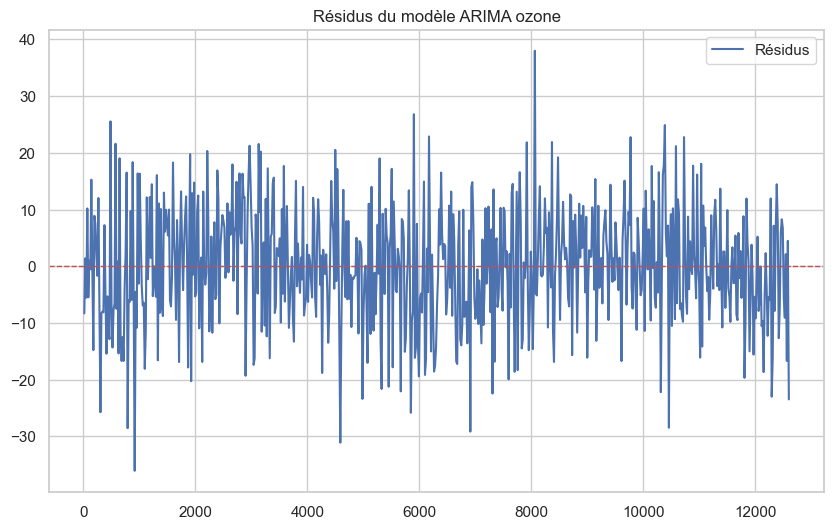

In [188]:
model_fit_ozone = modele.fit_arima(df_idf,"ozone",1,0,0)
modele.prediction_arima(df_idf,"ozone",model_fit_ozone)
forecast_ozone = modele.prevision_arima(df_idf,"ozone",model_fit_ozone)
modele.residus(df_idf,"ozone",model_fit_ozone)

### ARIMA nitrogen_dioxide

La série est stationnaire.


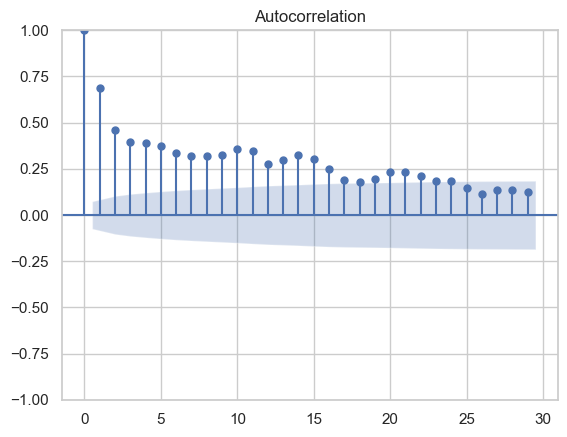

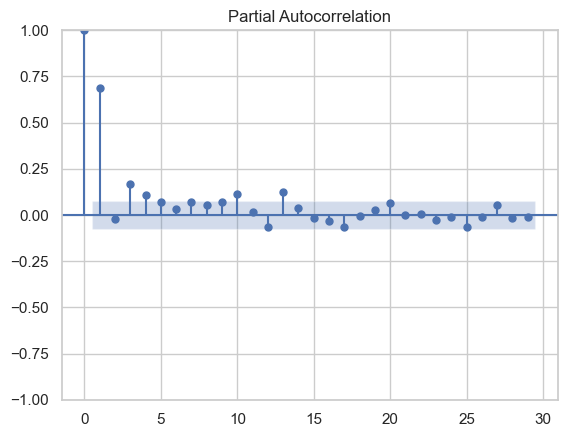

In [189]:

from scripts import modele
modele.stationarity_acf(df_idf,"nitrogen_dioxide")



c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


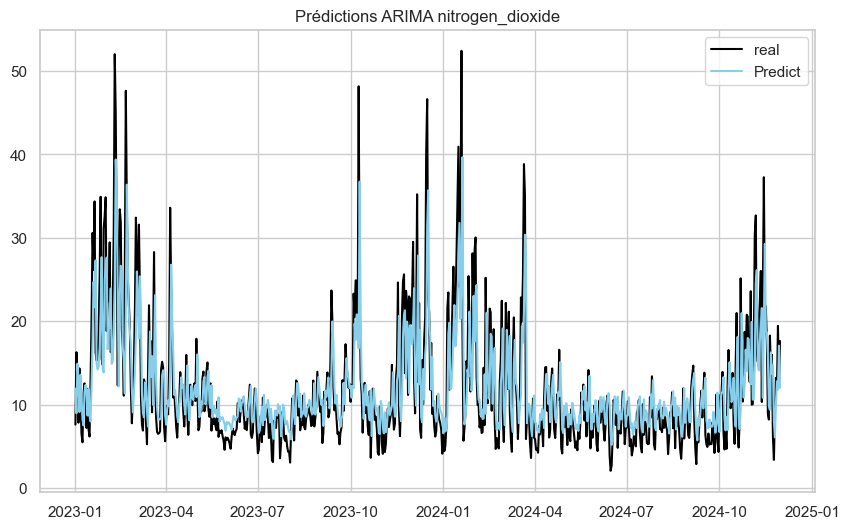

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


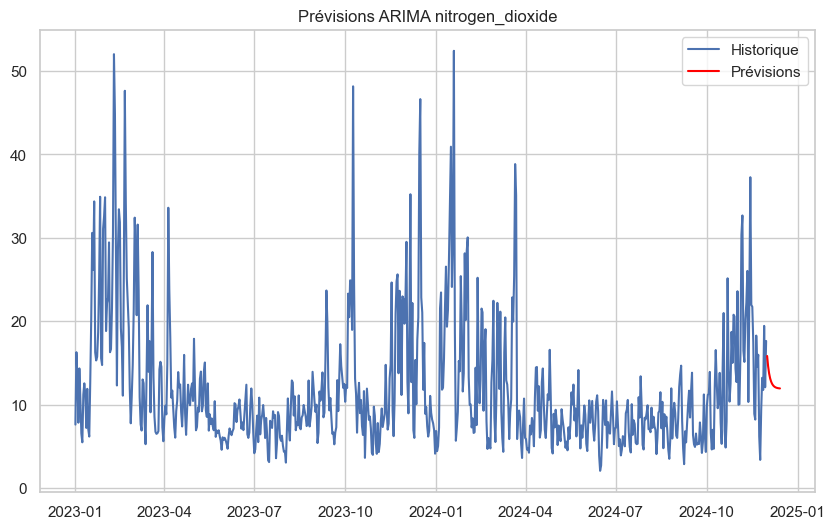

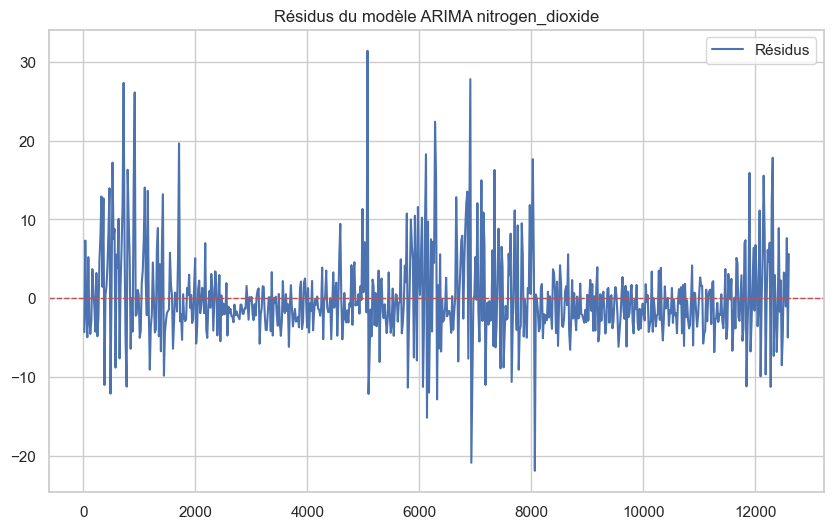

In [190]:
model_fit_nitrogen_dioxide = modele.fit_arima(df_idf,"nitrogen_dioxide",1,0,0)
modele.prediction_arima(df_idf,"nitrogen_dioxide",model_fit_nitrogen_dioxide)
forecast_nitrogen_dioxide = modele.prevision_arima(df_idf,"nitrogen_dioxide",model_fit_nitrogen_dioxide)
modele.residus(df_idf,"nitrogen_dioxide",model_fit_nitrogen_dioxide)

### ARIMA sulphur_dioxide

La série est stationnaire.


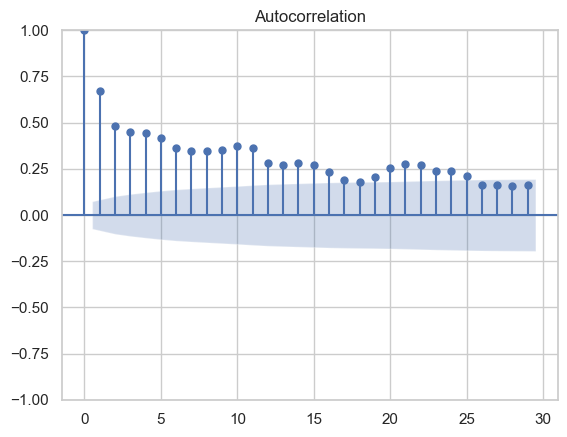

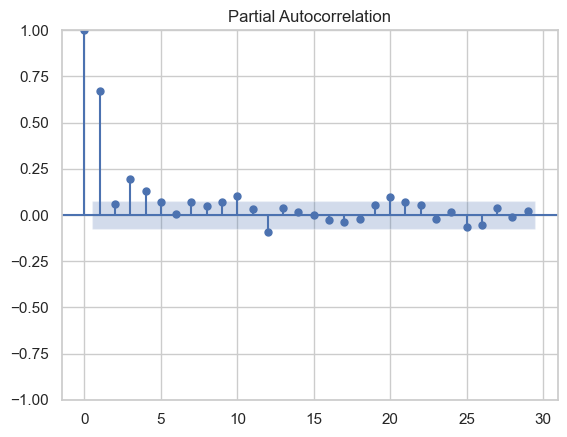

In [191]:

from scripts import modele
modele.stationarity_acf(df_idf,"sulphur_dioxide")



c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


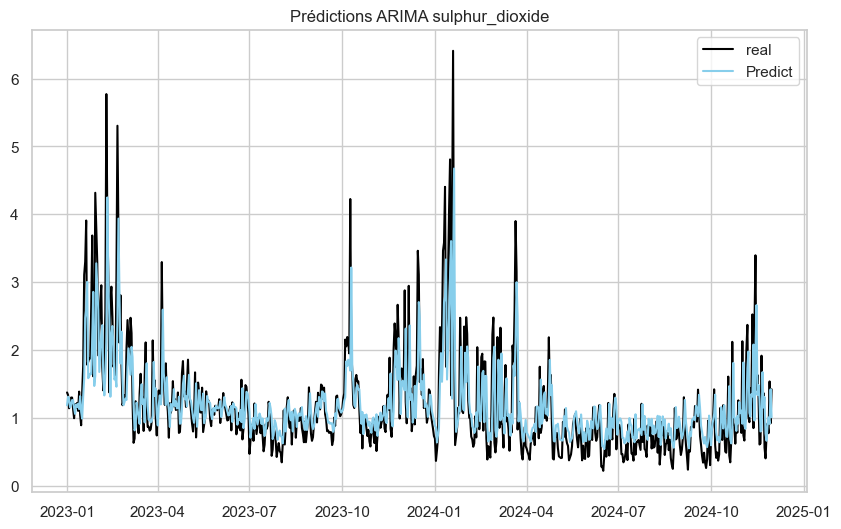

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


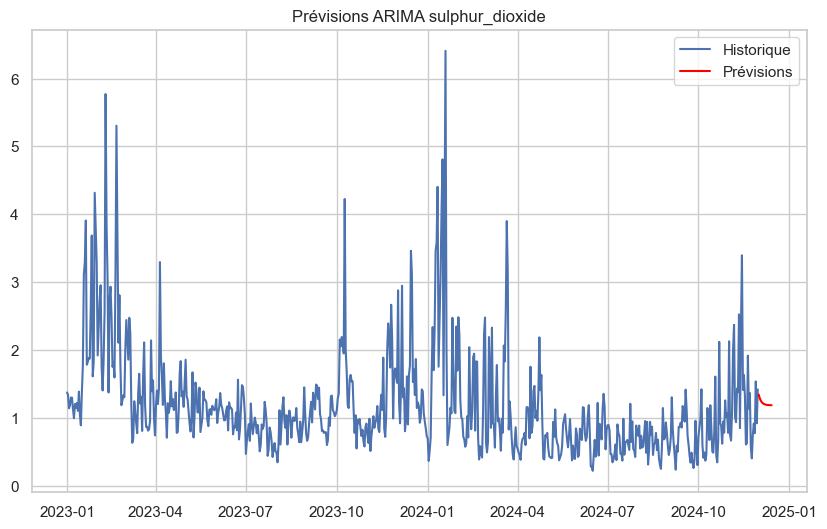

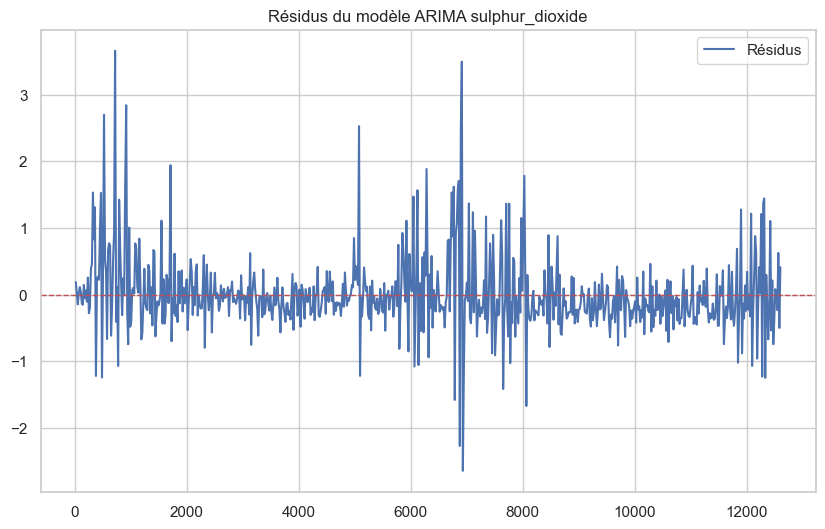

In [192]:
model_fit_sulphur_dioxide = modele.fit_arima(df_idf,"sulphur_dioxide",1,0,0)
modele.prediction_arima(df_idf,"sulphur_dioxide",model_fit_sulphur_dioxide)
forecast_sulphur_dioxide = modele.prevision_arima(df_idf,"sulphur_dioxide",model_fit_sulphur_dioxide)
modele.residus(df_idf,"sulphur_dioxide",model_fit_sulphur_dioxide)

In [203]:
forecast_arima = pd.DataFrame({"pm10" : list(forecast_pm10),
                               "pm2_5" : list(forecast_pm2_5),
                               "ozone" : list(forecast_ozone),
                               "nitrogen_dioxide" : list(forecast_nitrogen_dioxide),
                               "sulphur_dioxide" : list(forecast_sulphur_dioxide)},index=pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:])

forecast_arima

pm10      pm2_5      ozone  nitrogen_dioxide  sulphur_dioxide
2024-12-01  18.450265  15.669705  29.545616         15.837204         1.342927
2024-12-02  17.117725  14.050125  34.796466         14.603978         1.290895
2024-12-03  16.162074  12.851639  38.955709         13.759201         1.256146
2024-12-04  15.476715  11.964761  42.250282         13.180518         1.232937
2024-12-05  14.985200  11.308474  44.859941         12.784112         1.217437
2024-12-06  14.632703  10.822822  46.927076         12.512569         1.207086
2024-12-07  14.379905  10.463441  48.564471         12.326559         1.200172
2024-12-08  14.198607  10.197500  49.861465         12.199139         1.195554
2024-12-09  14.068586  10.000704  50.888826         12.111855         1.192471
2024-12-10  13.975340   9.855075  51.702608         12.052064         1.190411
2024-12-11  13.908467   9.747310  52.347211         12.011106         1.189036
2024-12-12  13.860509   9.667565  52.857807         11.983050         1.188117
2024-12-13  13.826114   9.608553  53.262254         11.963831         1.187503
2024-12-14  13.801448   9.564884  53.582621         11.950666         1.187094

In [193]:
from sklearn.preprocessing import StandardScaler


### var simple

In [138]:
scaler1 = StandardScaler()
#df_idf.set_index("day",inplace=True)
df_idf_var1 =  df_idf[['day','pm10', 'pm2_5', "ozone" ,'nitrogen_dioxide', 'sulphur_dioxide']].set_index("day")
df_idf_var1 = pd.DataFrame(scaler1.fit_transform(df_idf_var1), columns=df_idf_var1.columns, index=df_idf_var1.index)
#train_size = int(len(df_idf_var) * 0.95) #entrainement 90%
#train, test = df_idf_var[:train_size], df_idf_var[train_size:]
train1 = df_idf_var1

In [139]:
df_idf_var1

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide
day                                                                        
2023-01-01  0.240121 -0.008347 -0.505990         -0.556502         0.247064
2023-01-02 -0.630537 -0.514383 -0.320457          0.564945         0.198297
2023-01-03 -0.266617 -0.352220 -0.585151          0.165275        -0.056377
2023-01-04 -1.134287 -0.963228  0.139666         -0.527416         0.003228
2023-01-05 -1.071543 -0.821335 -0.216558          0.313400         0.149530
...              ...       ...       ...               ...              ...
2024-11-26 -0.145908 -0.155307 -0.402091          0.167968        -0.348980
2024-11-27 -0.910199 -0.639625 -0.194294         -0.020556        -0.533212
2024-11-28  0.166620  0.502033 -1.146699          0.972695         0.458389
2024-11-29  0.047704  0.370275 -0.644522          0.021458        -0.343561
2024-11-30  0.946447  1.468496 -1.906149          0.738926         0.306668

[700 rows x 5 columns]

In [140]:
#selection ordre du modèle
from statsmodels.tsa.api import VAR

# Initialiser le modèle
model1 = VAR(train1)

# Sélection de l'ordre optimal
selected_order1 = model1.select_order(maxlags=15)  # Ajustez maxlags en fonction des données
print(selected_order1.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -5.534      -5.500    0.003952      -5.521
1       -8.659     -8.460*   0.0001736      -8.582
2       -8.725      -8.362   0.0001624     -8.584*
3      -8.766*      -8.237  0.0001559*      -8.561
4       -8.752      -8.058   0.0001581      -8.484
5       -8.742      -7.882   0.0001598      -8.409
6       -8.703      -7.678   0.0001661      -8.307
7       -8.667      -7.477   0.0001723      -8.206
8       -8.637      -7.282   0.0001775      -8.113
9       -8.605      -7.085   0.0001833      -8.017
10      -8.594      -6.908   0.0001854      -7.942
11      -8.572      -6.721   0.0001897      -7.856
12      -8.548      -6.531   0.0001945      -7.767
13      -8.541      -6.359   0.0001960      -7.696
14      -8.513      -6.165   0.0002017      -7.604
15      -8.506      -5.993   0.0002032      -7.534
-------------------------------

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [141]:
optimal_lag1 = selected_order1.aic
optimal_lag1

np.int64(3)

In [142]:
# Fitting the VAR model with the optimal lag
#optimal_lag=1
var_model1 = model1.fit(optimal_lag1)

# Summary of the VAR model
var_model1_summary = var_model1.summary()
var_model1_summary

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Dec, 2024
Time:                     17:09:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -8.29156
Nobs:                     697.000    HQIC:                  -8.61165
Log likelihood:          -1793.52    FPE:                0.000148729
AIC:                     -8.81343    Det(Omega_mle):     0.000132774
--------------------------------------------------------------------
Results for equation pm10
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.002019         0.025512            0.079           0.937
L1.pm10                     0.414465         0.122447            3.385           0.001
L1.pm2_5                    0.227852 

In [143]:
print(train1.values.shape)  # Nombre de lignes et colonnes
print(var_model1.coefs.shape)  # Dimensions des coefficients

(700, 5)
(3, 5, 5)


In [144]:
# Faire des prédictions
forecast_steps = 14
forecast1 = var_model1.forecast(y=train1.values, steps=forecast_steps)

# Convertir les prévisions en DataFrame
forecast_df1 = pd.DataFrame(forecast1, index=pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:], columns=df_idf_var1.columns)
forecast_df1



pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide
2024-12-01  0.762227  1.231797 -1.546846          0.716565         0.349286
2024-12-02  0.369313  0.756047 -1.127244          0.498913         0.124195
2024-12-03  0.373218  0.692395 -0.975044          0.563493         0.260867
2024-12-04  0.435302  0.717293 -0.883730          0.602774         0.335297
2024-12-05  0.390554  0.640149 -0.752490          0.521741         0.276771
2024-12-06  0.322682  0.539578 -0.627727          0.439125         0.237472
2024-12-07  0.286941  0.476153 -0.536817          0.393309         0.228180
2024-12-08  0.263817  0.429856 -0.462537          0.352773         0.211967
2024-12-09  0.235643  0.381065 -0.395114          0.307704         0.187790
2024-12-10  0.207220  0.334320 -0.336908          0.267116         0.166103
2024-12-11  0.183793  0.294913 -0.288487          0.233747         0.148300
2024-12-12  0.163782  0.260994 -0.247523          0.204672         0.131785
2024-12-13  0.145320  0.230378 -0.212320          0.178500         0.116101
2024-12-14  0.128571  0.203012 -0.182225          0.155519         0.102006

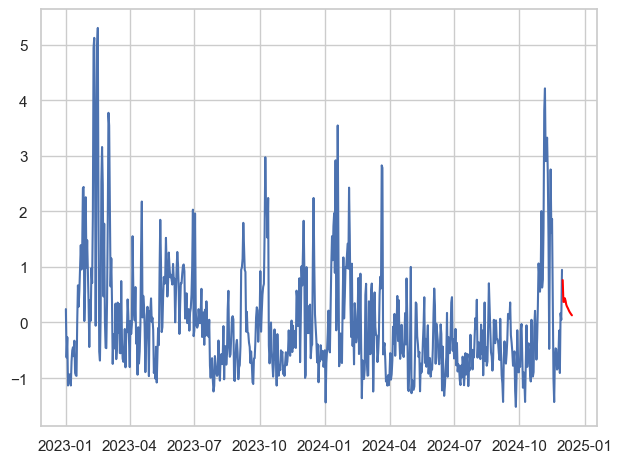

In [145]:
# Visualiser les prévisions
plt.Figure((10,5))
plt.plot(df_idf_var1.index,df_idf_var1["pm10"], label="Historique")
plt.plot(pd.date_range(max(df_idf_var1.index), periods=forecast_steps+1, freq='D')[1:],
         forecast_df1["pm10"],label="prevision VAR pm10",color="red")
plt.tight_layout()
plt.show()

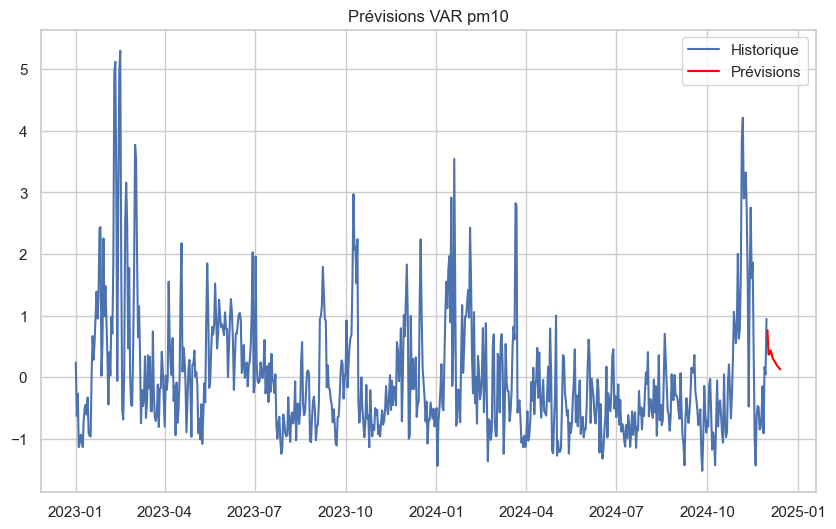

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide
2024-12-01  0.762227  1.231797 -1.546846          0.716565         0.349286
2024-12-02  0.369313  0.756047 -1.127244          0.498913         0.124195
2024-12-03  0.373218  0.692395 -0.975044          0.563493         0.260867
2024-12-04  0.435302  0.717293 -0.883730          0.602774         0.335297
2024-12-05  0.390554  0.640149 -0.752490          0.521741         0.276771
2024-12-06  0.322682  0.539578 -0.627727          0.439125         0.237472
2024-12-07  0.286941  0.476153 -0.536817          0.393309         0.228180
2024-12-08  0.263817  0.429856 -0.462537          0.352773         0.211967
2024-12-09  0.235643  0.381065 -0.395114          0.307704         0.187790
2024-12-10  0.207220  0.334320 -0.336908          0.267116         0.166103
2024-12-11  0.183793  0.294913 -0.288487          0.233747         0.148300
2024-12-12  0.163782  0.260994 -0.247523          0.204672         0.131785
2024-12-13  0.145320  0.230378 -0.212320          0.178500         0.116101
2024-12-14  0.128571  0.203012 -0.182225          0.155519         0.102006

In [146]:
modele.prevision_var(df_idf_var1,"pm10",var_model1)

In [147]:
resid1 = var_model1.resid
print(resid1.describe())

               pm10         pm2_5         ozone  nitrogen_dioxide  \
count  6.970000e+02  6.970000e+02  6.970000e+02      6.970000e+02   
mean  -2.548575e-18  9.047442e-17  7.390868e-17     -1.350745e-16   
std    6.661985e-01  6.385024e-01  5.998755e-01      7.025803e-01   
min   -3.004281e+00 -2.847974e+00 -2.012661e+00     -2.918509e+00   
25%   -3.911011e-01 -3.157531e-01 -3.988699e-01     -3.845697e-01   
50%   -4.838419e-02 -7.168720e-02 -1.269459e-02     -9.169955e-02   
75%    3.408013e-01  3.020245e-01  4.179363e-01      2.881362e-01   
max    3.453000e+00  3.262311e+00  2.049704e+00      4.222452e+00   

       sulphur_dioxide  
count     6.970000e+02  
mean     -1.274288e-16  
std       7.159777e-01  
min      -3.231495e+00  
25%      -3.601787e-01  
50%      -7.897059e-02  
75%       2.271854e-01  
max       4.796975e+00  


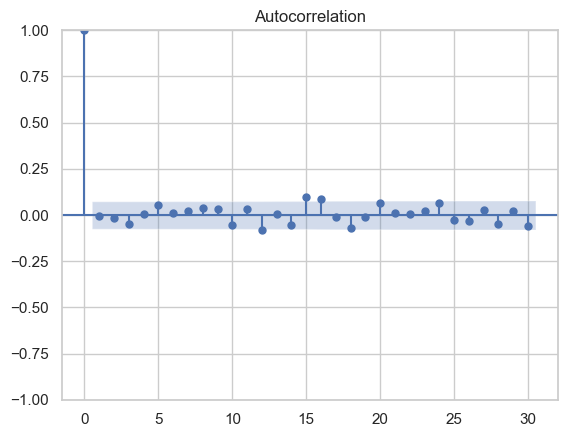

In [148]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(resid1["pm10"], lags=30)
plt.show()

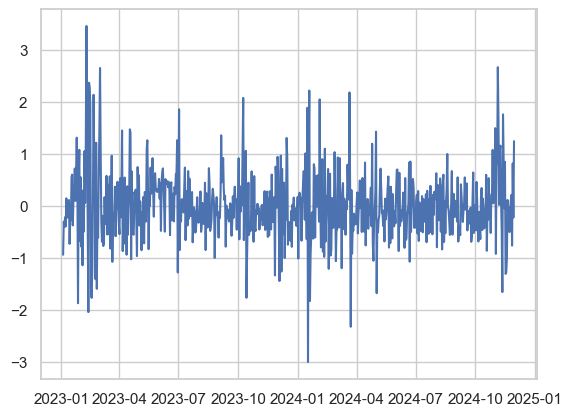

In [149]:
plt.plot(resid1["pm10"])

### var avec variables climatiques

In [150]:
scaler2 = StandardScaler()
#df_idf.set_index("day",inplace=True)
df_idf_var2 =  df_idf[['day','pm10', 'pm2_5', "ozone" ,'nitrogen_dioxide', 'sulphur_dioxide',"temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m"]].set_index("day")
df_idf_var2 = pd.DataFrame(scaler2.fit_transform(df_idf_var2), columns=df_idf_var2.columns, index=df_idf_var2.index)
#train_size = int(len(df_idf_var) * 0.95) #entrainement 90%
#train, test = df_idf_var[:train_size], df_idf_var[train_size:]
train2 = df_idf_var2

In [151]:
df_idf_var2

pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
day                                                                           
2023-01-01  0.240121 -0.008347 -0.505990         -0.556502         0.247064   
2023-01-02 -0.630537 -0.514383 -0.320457          0.564945         0.198297   
2023-01-03 -0.266617 -0.352220 -0.585151          0.165275        -0.056377   
2023-01-04 -1.134287 -0.963228  0.139666         -0.527416         0.003228   
2023-01-05 -1.071543 -0.821335 -0.216558          0.313400         0.149530   
...              ...       ...       ...               ...              ...   
2024-11-26 -0.145908 -0.155307 -0.402091          0.167968        -0.348980   
2024-11-27 -0.910199 -0.639625 -0.194294         -0.020556        -0.533212   
2024-11-28  0.166620  0.502033 -1.146699          0.972695         0.458389   
2024-11-29  0.047704  0.370275 -0.644522          0.021458        -0.343561   
2024-11-30  0.946447  1.468496 -1.906149          0.738926         0.306668   

            temperature_2m  relative_humidity_2m  precipitation  \
day                                                               
2023-01-01        0.096452             -0.674185      -0.176358   
2023-01-02       -0.486798              1.110819       1.402707   
2023-01-03       -0.862204              1.363247      -0.257336   
2023-01-04       -0.221408              1.177189      -0.014402   
2023-01-05       -0.114100              1.064786      -0.459780   
...                    ...                   ...            ...   
2024-11-26       -0.714953              1.104284      -0.034647   
2024-11-27       -0.425528              1.325158       0.673908   
2024-11-28       -1.088666              0.637859      -0.540757   
2024-11-29       -1.543621              0.763325      -0.561002   
2024-11-30       -1.671577              1.285015      -0.561002   

            surface_pressure  wind_speed_10m  
day                                           
2023-01-01         -0.053938        1.133370  
2023-01-02          0.491810        0.116135  
2023-01-03          1.293998        0.575717  
2023-01-04          0.934511        2.160129  
2023-01-05          0.953974        0.354028  
...                      ...             ...  
2024-11-26          0.400143       -0.348995  
2024-11-27          0.212840        0.755983  
2024-11-28          1.219469       -1.130912  
2024-11-29          1.356512       -0.643161  
2024-11-30          1.210820       -1.475171  

[700 rows x 10 columns]

In [152]:
#selection ordre du modèle
from statsmodels.tsa.api import VAR

# Initialiser le modèle
model2 = VAR(train2)

# Sélection de l'ordre optimal
selected_order2 = model2.select_order(maxlags=15)  # Ajustez maxlags en fonction des données
print(selected_order2.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -8.518      -8.452   0.0001998      -8.492
1       -15.58     -14.85*   1.717e-07      -15.30
2      -15.85*      -14.46  1.313e-07*     -15.31*
3       -15.82      -13.77   1.352e-07      -15.02
4       -15.71      -13.00   1.508e-07      -14.66
5       -15.62      -12.24   1.658e-07      -14.31
6       -15.49      -11.45   1.887e-07      -13.93
7       -15.42      -10.73   2.016e-07      -13.61
8       -15.28      -9.921   2.346e-07      -13.20
9       -15.15      -9.131   2.681e-07      -12.82
10      -15.06      -8.383   2.940e-07      -12.48
11      -14.96      -7.620   3.280e-07      -12.12
12      -14.87      -6.868   3.619e-07      -11.77
13      -14.88      -6.218   3.617e-07      -11.53
14      -14.77      -5.443   4.101e-07      -11.16
15      -14.73      -4.748   4.301e-07      -10.87
-------------------------------

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [153]:
optimal_lag2 = selected_order2.aic
optimal_lag2

np.int64(2)

In [154]:
# Fitting the VAR model with the optimal lag
#optimal_lag=1
var_model2 = model.fit(optimal_lag2)

# Summary of the VAR model
var_model2_summary = var_model2.summary()
var_model2_summary

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, Dec, 2024
Time:                     17:09:08
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -14.5239
Nobs:                     698.000    HQIC:                  -15.3632
Log likelihood:          -4147.80    FPE:                1.25363e-07
AIC:                     -15.8922    Det(Omega_mle):     9.32041e-08
--------------------------------------------------------------------
Results for equation pm10
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.001852         0.025303            0.073           0.942
L1.pm10                         0.498753         0.130026            3.836           0.000
L1.pm2_5             

In [155]:
# Faire des prédictions
forecast_steps = 14
forecast2 = var_model2.forecast(y=train2.values, steps=forecast_steps)

# Convertir les prévisions en DataFrame
forecast_df2 = pd.DataFrame(forecast2, index=pd.date_range(max(df_idf["day"]), periods=forecast_steps+1, freq='D')[1:], columns=df_idf_var2.columns)
forecast_df2



pm10     pm2_5     ozone  nitrogen_dioxide  sulphur_dioxide  \
2024-12-01  0.982075  1.519064 -1.626527          0.942944         0.569323   
2024-12-02  0.919714  1.391158 -1.348804          1.026408         0.686002   
2024-12-03  0.725531  1.127881 -1.119418          0.885997         0.585338   
2024-12-04  0.527513  0.869785 -0.934144          0.723685         0.486389   
2024-12-05  0.404447  0.700909 -0.802466          0.626953         0.443865   
2024-12-06  0.340484  0.602563 -0.709362          0.573637         0.429811   
2024-12-07  0.302042  0.536611 -0.638120          0.534852         0.419788   
2024-12-08  0.271186  0.482763 -0.580105          0.499618         0.406909   
2024-12-09  0.243245  0.435488 -0.531869          0.466794         0.392133   
2024-12-10  0.218414  0.394480 -0.491506          0.437227         0.377279   
2024-12-11  0.197279  0.359790 -0.457408          0.411170         0.363155   
2024-12-12  0.179751  0.330790 -0.428192          0.388252         0.349825   
2024-12-13  0.165294  0.306486 -0.402787          0.367915         0.337131   
2024-12-14  0.153280  0.285903 -0.380407          0.349667         0.324937   

            temperature_2m  relative_humidity_2m  precipitation  \
2024-12-01       -1.311874              1.141761      -0.397067   
2024-12-02       -1.131672              1.074655      -0.282827   
2024-12-03       -1.075689              1.020344      -0.161438   
2024-12-04       -1.047048              0.936912      -0.128776   
2024-12-05       -1.015926              0.850844      -0.127319   
2024-12-06       -0.980985              0.781016      -0.119052   
2024-12-07       -0.946291              0.725977      -0.102857   
2024-12-08       -0.914005              0.679626      -0.085889   
2024-12-09       -0.883927              0.638366      -0.071838   
2024-12-10       -0.855055              0.600990      -0.061138   
2024-12-11       -0.826658              0.567185      -0.053042   
2024-12-12       -0.798505              0.536711      -0.046763   
2024-12-13       -0.770672              0.509206      -0.041771   
2024-12-14       -0.743330              0.484255      -0.037734   

            surface_pressure  wind_speed_10m  
2024-12-01          0.702782       -0.680805  
2024-12-02          0.529726       -0.316964  
2024-12-03          0.493077       -0.161425  
2024-12-04          0.460235       -0.058431  
2024-12-05          0.407395        0.016061  
2024-12-06          0.341563        0.070849  
2024-12-07          0.274046        0.113330  
2024-12-08          0.213379        0.146628  
2024-12-09          0.163435        0.171997  
2024-12-10          0.124439        0.190505  
2024-12-11          0.094798        0.203293  
2024-12-12          0.072459        0.211443  
2024-12-13          0.055578        0.215903  
2024-12-14          0.042720        0.217475

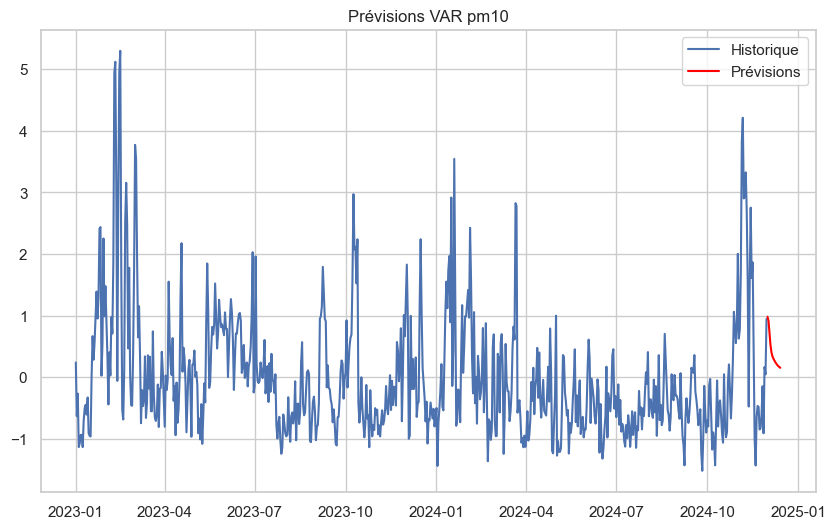

In [171]:
forecast_var_pm10 = modele.prevision_var(df_idf_var2,"pm10",var_model2)

In [172]:
resid2 = var_model2.resid
resid2.describe()

pm10         pm2_5         ozone  nitrogen_dioxide  \
count  6.980000e+02  6.980000e+02  6.980000e+02      6.980000e+02   
mean   1.297911e-16  2.570373e-16 -7.380279e-17      7.380279e-17   
std    6.587923e-01  6.301610e-01  5.896090e-01      6.947984e-01   
min   -2.125641e+00 -2.458355e+00 -1.970284e+00     -2.423753e+00   
25%   -3.779055e-01 -3.402965e-01 -3.963164e-01     -3.931130e-01   
50%   -3.961027e-02 -6.627654e-02  1.229977e-02     -8.149312e-02   
75%    3.322187e-01  2.767326e-01  4.201867e-01      2.964649e-01   
max    2.900687e+00  3.150256e+00  1.976933e+00      4.326169e+00   

       sulphur_dioxide  temperature_2m  relative_humidity_2m  precipitation  \
count     6.980000e+02    6.980000e+02          6.980000e+02   6.980000e+02   
mean      1.628751e-16   -2.334968e-16          4.326371e-17  -1.297911e-16   
std       7.081852e-01    2.895633e-01          6.218409e-01   9.422526e-01   
min      -2.864269e+00   -1.092135e+00         -2.150971e+00  -1.490610e+00   
25%      -3.704017e-01   -1.829316e-01         -4.307992e-01  -4.984111e-01   
50%      -7.484665e-02    4.490147e-04         -2.164572e-02  -2.405052e-01   
75%       2.564697e-01    1.926641e-01          4.016102e-01   1.112800e-01   
max       4.520050e+00    1.209940e+00          2.171690e+00   1.018887e+01   

       surface_pressure  wind_speed_10m  
count      6.980000e+02    6.980000e+02  
mean       7.221221e-17   -1.908693e-16  
std        5.003081e-01    7.729449e-01  
min       -2.096602e+00   -2.258905e+00  
25%       -2.899028e-01   -5.326270e-01  
50%        3.095736e-02   -5.857267e-02  
75%        2.942932e-01    4.723965e-01  
max        1.795132e+00    2.820452e+00

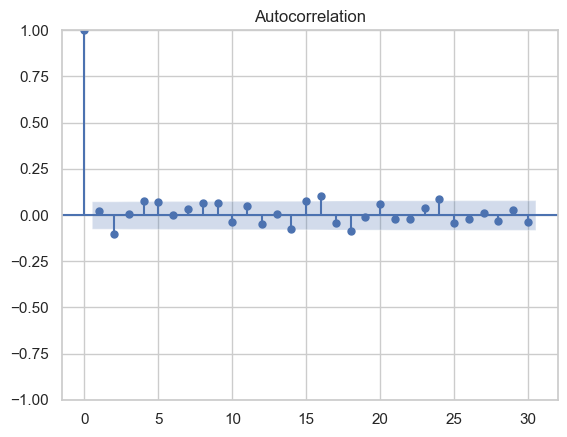

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(resid2["pm10"], lags=30)
plt.show()

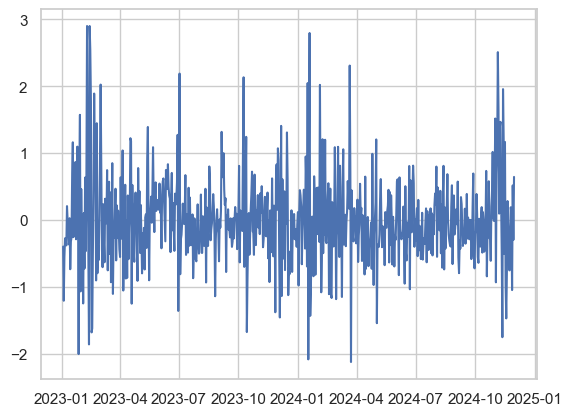

In [160]:
plt.plot(resid2["pm10"])

In [161]:
import importlib
from scripts import modele  # Supposez que votre module est `scripts.api`

# Rechargez le module
importlib.reload(modele)

<module 'scripts.modele' from 'c:\\Users\\steph\\Documents\\ENSAE\\Python pour la data science\\Projet_Python_2024-1\\scripts\\modele.py'>

### Evaluation du modèle

la qualité du modèle sera testé en comparant les prévisions faites sur les 2 premières semaine du mois de décembre 2024.

In [162]:
import importlib
from scripts import api  # Supposez que votre module est `scripts.api`

# Rechargez le module
importlib.reload(api)

idf_centroid = [('Île-de-France', 2.503401392552759, 48.70931550109074)]
var_air=["pm10", "pm2_5", "nitrogen_dioxide", "sulphur_dioxide", "ozone"]
test = api.recup_data("2024-12-01","2024-12-14","https://air-quality-api.open-meteo.com/v1/air-quality",var_air,idf_centroid)
test = test[["day","pm10", "pm2_5", "nitrogen_dioxide", "sulphur_dioxide", "ozone"]].groupby(['day']).mean().reset_index()

In [163]:
test

day       pm10      pm2_5  nitrogen_dioxide  sulphur_dioxide  \
0   2024-12-01  21.391668  16.983334         12.004167         0.683333   
1   2024-12-02  10.279166   6.500000         11.054166         0.983333   
2   2024-12-03  20.741667  16.258333         33.866665         3.379167   
3   2024-12-04  29.716667  25.462500         34.725002         2.066667   
4   2024-12-05   7.325000   6.125000          8.141666         0.591667   
5   2024-12-06  10.245833   6.108334         14.520833         1.483333   
6   2024-12-07   5.566667   3.283334          4.945833         0.466667   
7   2024-12-08   5.529167   4.187500          9.112500         0.858333   
8   2024-12-09  10.254167   8.870833         11.175000         1.166667   
9   2024-12-10  10.512500   9.245833         12.691667         1.745833   
10  2024-12-11  15.816667  13.804166         12.604167         1.841667   
11  2024-12-12  22.220833  17.862501         16.241667         1.708333   
12  2024-12-13  40.187500  36.654167         27.083334         3.225000   
13  2024-12-14  40.062500  36.354168         39.975002         4.525000   

        ozone  
0   34.416668  
1   50.875000  
2   21.500000  
3   13.500000  
4   52.708332  
5   58.708332  
6   69.375000  
7   45.500000  
8   35.000000  
9   31.458334  
10  34.458332  
11  37.416668  
12  18.083334  
13  14.708333

In [164]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(forecast_pm10, test["pm10"])

11.932584275126755

In [168]:
forecast_original_df1 = pd.DataFrame(scaler1.inverse_transform(forecast_df1), columns=forecast_df1.columns)
forecast_original_df1

pm10      pm2_5      ozone  nitrogen_dioxide  sulphur_dioxide
0   19.023820  16.496009  28.968525         17.464528         1.453605
1   16.284147  13.757816  36.036015         15.780869         1.280519
2   16.311375  13.391467  38.599573         16.280431         1.385614
3   16.744272  13.534767  40.137597         16.584295         1.442848
4   16.432253  13.090764  42.348123         15.957461         1.397843
5   15.959003  12.511929  44.449540         15.318376         1.367624
6   15.709792  12.146883  45.980766         14.963967         1.360479
7   15.548560  11.880418  47.231901         14.650402         1.348012
8   15.352112  11.599604  48.367518         14.301765         1.329421
9   15.153923  11.330562  49.347912         13.987798         1.312744
10  14.990572  11.103755  50.163473         13.729674         1.299054
11  14.851042  10.908530  50.853440         13.504762         1.286355
12  14.722316  10.732318  51.446380         13.302305         1.274295
13  14.605529  10.574816  51.953281         13.124535         1.263456

In [166]:
forecast_original_df2 = pd.DataFrame(scaler2.inverse_transform(forecast_df2), columns=forecast_df2.columns)
forecast_original_df2

pm10      pm2_5      ozone  nitrogen_dioxide  sulphur_dioxide  \
0   20.556754  18.149379  27.626432         19.215694         1.622804   
1   20.121926  17.413212  32.304209         19.861332         1.712525   
2   18.767951  15.897915  36.167838         18.775173         1.635118   
3   17.387231  14.412442  39.288455         17.519606         1.559031   
4   16.529126  13.440468  41.506365         16.771328         1.526332   
5   16.083132  12.874439  43.074536         16.358905         1.515525   
6   15.815087  12.494851  44.274494         16.058881         1.507818   
7   15.599941  12.184925  45.251665         15.786328         1.497914   
8   15.405119  11.912835  46.064111         15.532413         1.486552   
9   15.231977  11.676811  46.743953         15.303696         1.475130   
10  15.084607  11.477151  47.318283         15.102136         1.464269   
11  14.962388  11.310242  47.810375         14.924850         1.454019   
12  14.861583  11.170364  48.238292         14.767533         1.444257   
13  14.777816  11.051895  48.615231         14.626370         1.434881   

    temperature_2m  relative_humidity_2m  precipitation  surface_pressure  \
0         4.984610             89.313714       0.033741       1017.061620   
1         6.093656             88.656716       0.057253       1015.398205   
2         6.438202             88.124994       0.082237       1015.045937   
3         6.614469             87.308166       0.088960       1014.730255   
4         6.806009             86.465521       0.089260       1014.222361   
5         7.021050             85.781886       0.090961       1013.589579   
6         7.234576             85.243027       0.094294       1012.940604   
7         7.433279             84.789234       0.097787       1012.357477   
8         7.618387             84.385289       0.100679       1011.877410   
9         7.796083             84.019362       0.102881       1011.502581   
10        7.970849             83.688401       0.104547       1011.217676   
11        8.144116             83.390040       0.105840       1011.002957   
12        8.315411             83.120757       0.106867       1010.840696   
13        8.483690             82.876480       0.107698       1010.717103   

    wind_speed_10m  
0         9.399031  
1        11.475591  
2        12.363304  
3        12.951121  
4        13.376271  
5        13.688966  
6        13.931420  
7        14.121464  
8        14.266253  
9        14.371884  
10       14.444866  
11       14.491381  
12       14.516836  
13       14.525812

In [204]:
from sklearn.metrics import root_mean_squared_error

for col in polluants :
    print("RMSE ARIMA {} : {}". format(col,root_mean_squared_error(forecast_arima[col], test[col])))

RMSE ARIMA pm10 : 11.936035181230721
RMSE ARIMA pm2_5 : 11.722040224449525
RMSE ARIMA ozone : 20.763146392669473
RMSE ARIMA nitrogen_dioxide : 12.009202631389586
RMSE ARIMA sulphur_dioxide : 1.285922529897157


In [177]:
from sklearn.metrics import root_mean_squared_error

for col in polluants :
    print("RMSE VAR 1 {} : {}". format(col,root_mean_squared_error(forecast_original_df1[col], test[col])))


RMSE VAR 1 pm10 : 11.794343755681783
RMSE VAR 1 pm2_5 : 11.447501170201882
RMSE VAR 1 ozone : 19.890730492332125
RMSE VAR 1 nitrogen_dioxide : 11.384044604136646
RMSE VAR 1 sulphur_dioxide : 1.2500429788706708


In [178]:
from sklearn.metrics import root_mean_squared_error

for col in polluants :
    print("RMSE VAR 2 {} : {}". format(col,root_mean_squared_error(forecast_original_df2[col], test[col])))

RMSE VAR 2 pm10 : 11.836602272364733
RMSE VAR 2 pm2_5 : 11.476492862873986
RMSE VAR 2 ozone : 18.821795195008704
RMSE VAR 2 nitrogen_dioxide : 11.10744977383478
RMSE VAR 2 sulphur_dioxide : 1.2007144438043902


| RMSE Modele      | pm10   | pm2_5  | ozone  | nitrogen_dioxide | sulphur_dioxide |
|----------------|---------|--------|--------|------------------|-----------------|
| ARIMA          | 11.936 | 11.722 | 20.763 | 12.009           | 1.286           |
| VAR 1          | 11.794 | 11.448 | 19.891 | 11.384           | 1.250           |
| VAR 2          | 11.837 | 11.476 | 18.822 | 11.107           | 1.201           |
